# **� DOMAIN: Healthcare**

# **� CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions.University has an internal AI team. Due to confidentiality the patient�s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.**

**� DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.**
> **1. P_incidence**

> **2. P_tilt**

> **3. L_angle**

> **4. S_slope**

> **5. P_radius**

> **6. S_degree**

> **7. Class**

1. **pelvic_incidence-P_incidence**
2. **pelvic_tilt numeric-P_tilt**
3. **lumbar_lordosis_angle-L_angle**
4. **sacral_slope-S_slope**
5. **pelvic_radius-P_radius**
6. **degree_spondylolisthesis-S_degree**
7. **class**

# Importing Necessary Packages

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

# 1. Import and warehouse data:

**Dataset 1**

In [ ]:
df1=pd.read_csv('../input/patients-condition/Part1 - Normal.csv')

**Checking First 5 Rows**

In [ ]:
df1.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

**Shape of the dataset**

In [ ]:
df1.shape

(100, 7)

**We have 7 columns and 100 rows**

**Dataset-2**

In [ ]:
df2=pd.read_csv('../input/patients-condition/Part1 - Type_H.csv')

**Shape of the dataset**

In [ ]:
df2.shape

(60, 7)

**Checking First 5 Rows**

In [ ]:
df2.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

**Shape of the dataset**

In [ ]:
df2.shape

(60, 7)

**We have 7 columns and 60 rows**

**Dataset-3**

In [ ]:
df3=pd.read_csv('../input/patients-condition/Part1 - Type_S.csv')

**Checking First 5 Rows**

In [ ]:
df3.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

**Shape of the dataset**

In [ ]:
df3.shape

(150, 7)

**We have 7 columns and 150 rows**

**Final Dataframe**

In [ ]:
df=df1.append([df2,df3])

**Shape of the dataset**

In [ ]:
df.shape

(310, 7)

**Final Dataset have 7 columns and 310 rows**

# 2. Data cleansing:

**Information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


**Checking Datatypes**

In [ ]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**There is no junk values in the dataset**

**Class is object we need to change the datatype of this column**

**Missing Value Check**

In [ ]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**There is no missing value in the dataset**

**Target Variable:**

In [ ]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

**Here tp_s and Type_S, Normal and Nrmal,Type_H and type_ h represents same class.**

In [ ]:
df.loc[df['Class']=='tp_s','Class']='Type_S'
df.loc[df['Class']=='Nrmal','Class']='Normal'
df.loc[df['Class']=='type_h','Class']='Type_H'

In [ ]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [ ]:
df['Class']=df['Class'].astype('category') #changing to category datatype

In [ ]:
df['Class'].nunique()

3

**Here we have three different class in our dataset**

# 3.Data Analysis & Visulaization

**5 Point Summary**

In [ ]:
df.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

**P_incidence:**

>  **Mean and Median are nearly equal .**

> **Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129**

**P_tilt:**

> **Mean and median are nearly equal.**

> **Distribution might be normal.**

> **It contains negative values**

> **75 % of values are less than 22 but maximum value is 49 so there might be little right skewness**

**L_angle:**

> **Mean and Median are nearly equal. There is no  deviation.**

> **Distribution might be normal**

> **There might be few outliers because of the maximum value**

**S_slope:**

> **Mean and Median are nearly equal.**

> **Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.**

**P_radius:**

> **Distribution might be normal.**

> **There is no much Deviation.**

**S_Degree:**

> **Mean is greater than Median so there might be right skewness in the data .**

> **We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.**



# **Univariate Analysis**

**Distribution and outlier analysis of numerical variables**

**P_incidence**

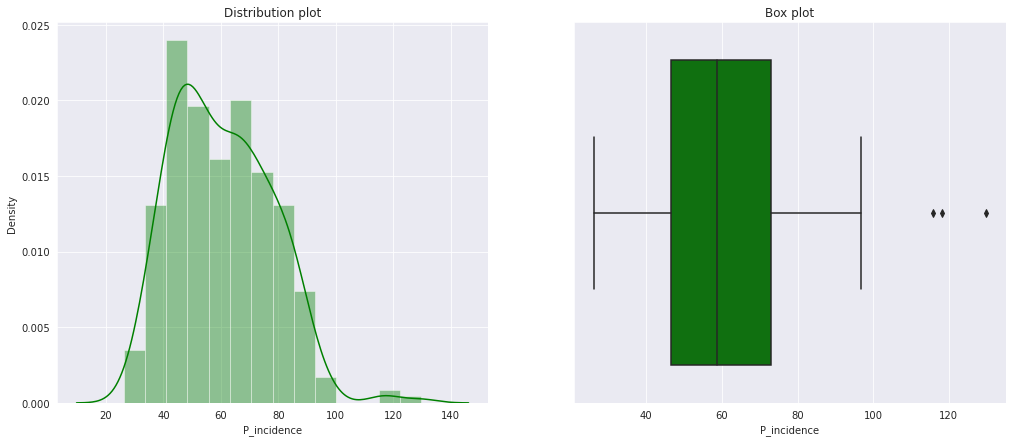

 Total Number of outliers in P_incidence: 3


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_incidence'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_incidence'],25),np.percentile(df['P_incidence'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_incidence'] if i < lower or i > upper]
print('{} Total Number of outliers in P_incidence: {}'.format('\033[1m',len(Outliers)))

> **Normality is maintained with very less extreme values**

> **We can see three outliers exists in the column**

**P_tilt**

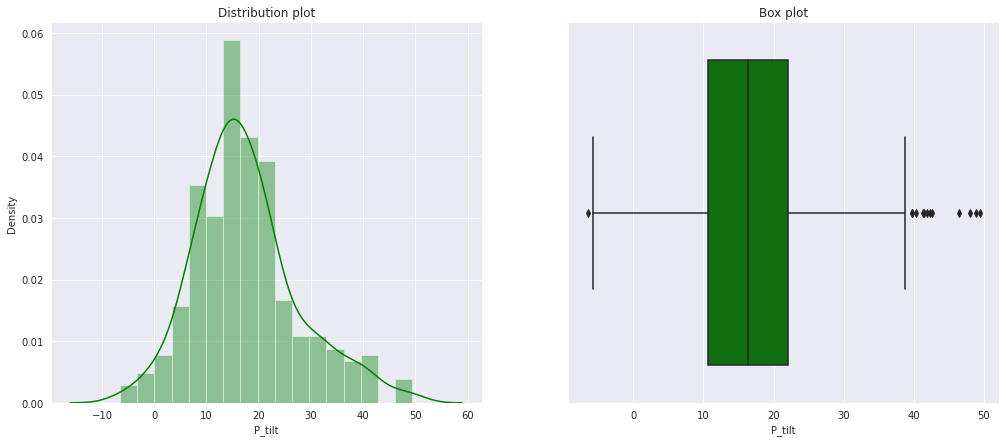

 Total Number of outliers in P_tilt: 13


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_tilt'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_tilt'],25),np.percentile(df['P_tilt'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_tilt'] if i < lower or i > upper]
print('{} Total Number of outliers in P_tilt: {}'.format('\033[1m',len(Outliers)))

> **Data is Normally distributed and we can see one peakness in the center**

> **It is has little skewness towards right side**

> **We can see one outlier in negative end and few outliers in positive end.**

**L_angle**

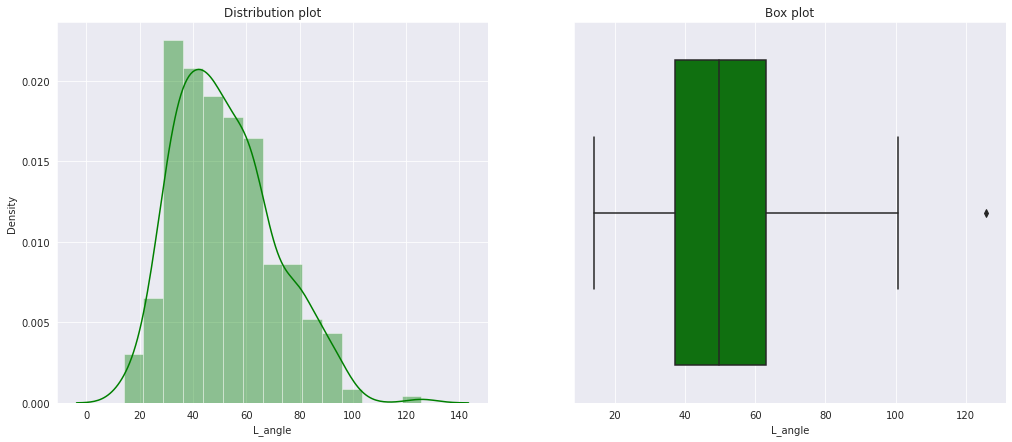

 Total Number of outliers in L_angle: 1


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['L_angle'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['L_angle'],25),np.percentile(df['L_angle'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['L_angle'] if i < lower or i > upper]
print('{} Total Number of outliers in L_angle: {}'.format('\033[1m',len(Outliers)))

> **It is Normally distributed**

> **Little right skewness because of one outlier**

**S_slope**

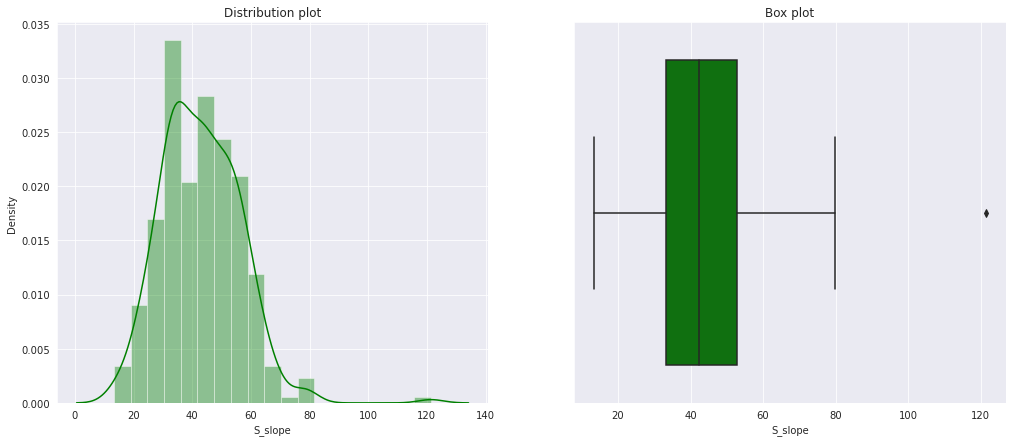

 Total Number of outliers in S_slope: 1


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_slope'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_slope'],25),np.percentile(df['S_slope'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_slope'] if i < lower or i > upper]
print('{} Total Number of outliers in S_slope: {}'.format('\033[1m',len(Outliers)))

> **There is right skewness due to one outlier**

**P_radius**

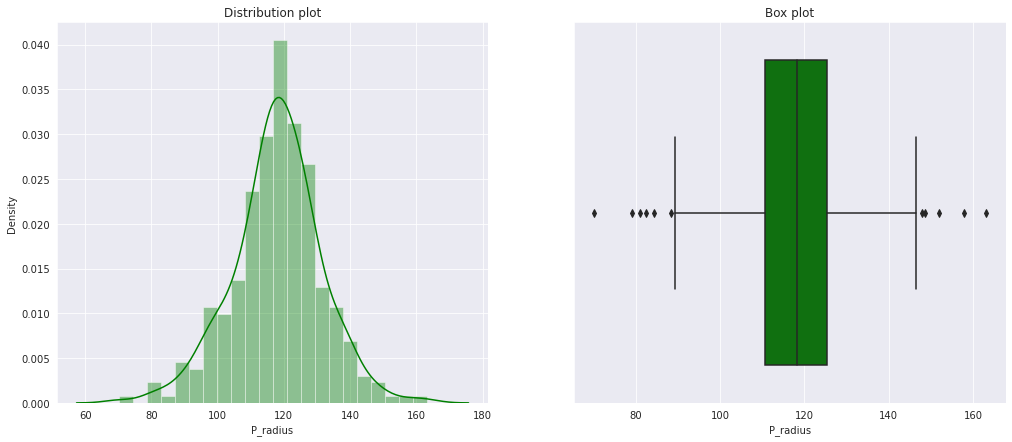

 Total Number of outliers in P_radius: 11


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_radius'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_radius'],25),np.percentile(df['P_radius'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_radius'] if i < lower or i > upper]
print('{} Total Number of outliers in P_radius: {}'.format('\033[1m',len(Outliers)))

> **Data is normally distributed**

> **We can see outliers at both the ends.**

**S_Degree**

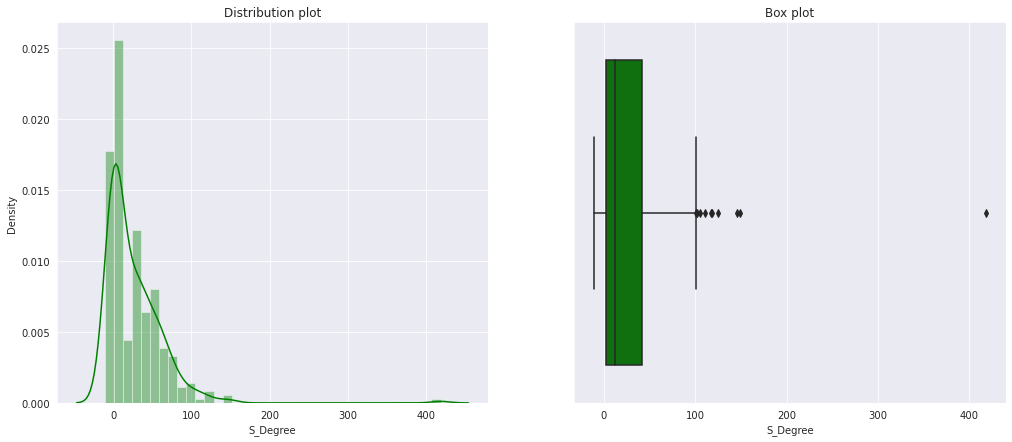

 Total Number of outliers in S_Degree: 10


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_Degree'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_Degree'],25),np.percentile(df['S_Degree'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_Degree'] if i < lower or i > upper]
print('{} Total Number of outliers in S_Degree: {}'.format('\033[1m',len(Outliers)))

> **There is Positive Skewness in the data**

> **Hugely affected by Outliers**

**Distribution of Target Variable**

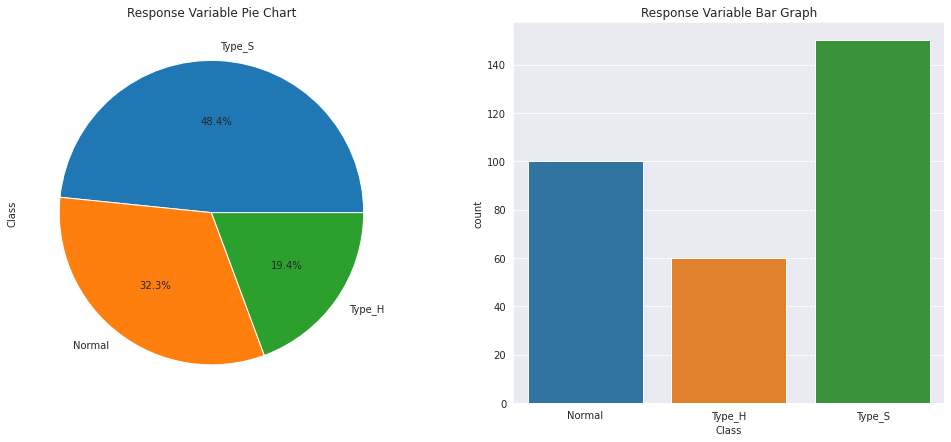

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df,ax=axes[1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**Type_S variable has 48.4% of total values followed by Normal and Type_H**

 # **Bi Variate Analysis**

**Class vs P_incidence**

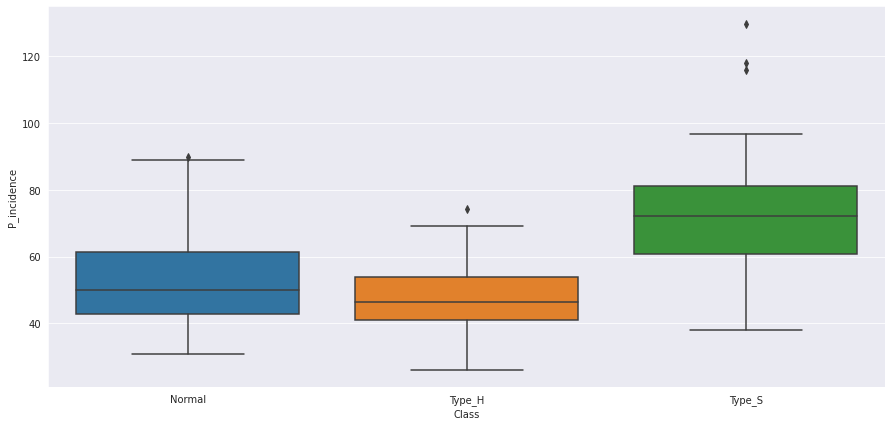

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

> **P_Incidence Value is larger for Type_S Class. We can see some extreme values as well**

> **Normal Value is slightly higher than Type_H**

**Class vs P_tilt**

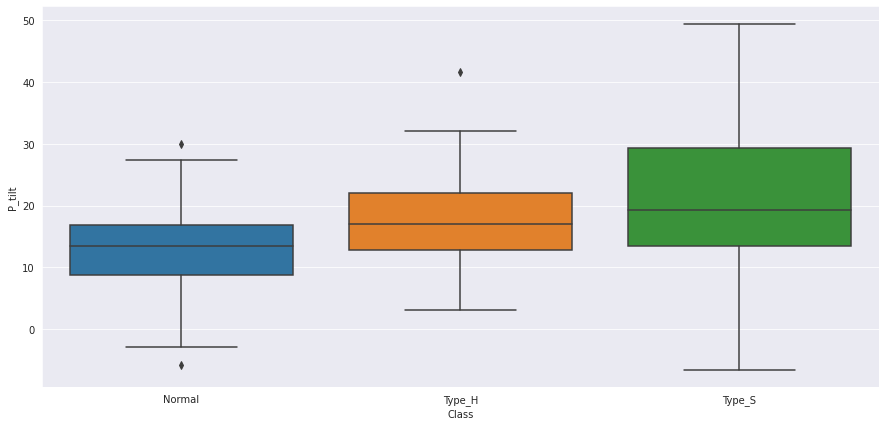

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_tilt', data= df)
plt.show()

> **Mean of Type_S is slightly higher than rest two**

> **Few cases Normal and Type_H also has huge values**

**Class vs L_angle**

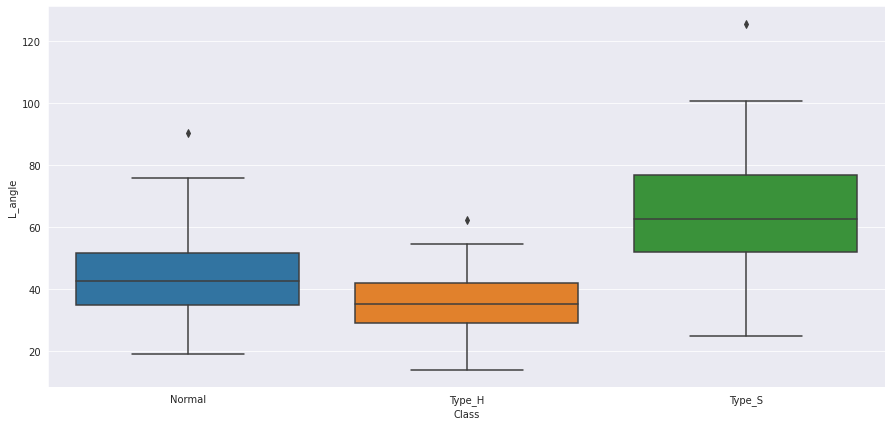

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='L_angle', data= df)
plt.show()

> **L_Angle has higher value for Type_S Class**

>**We can see Normal class has higher values compared to type_H class**

> **Each class contains one outlier**

**Class vs S_slope**

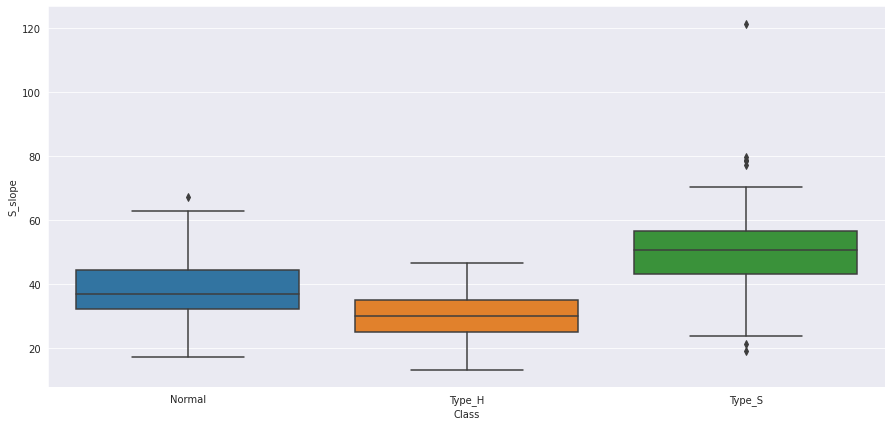

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_slope', data= df)
plt.show()

> **S_slope has huge values for Type_S class**

>**Normal class has high s_slope compared to Type_H**

**Class vs P_radius**

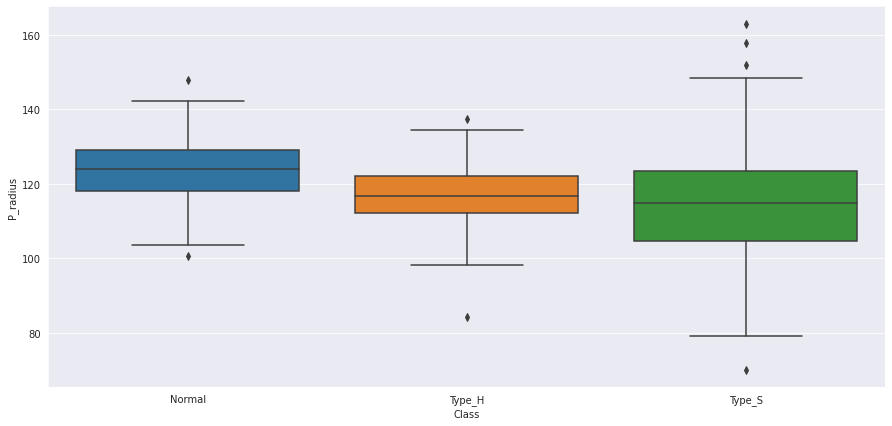

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_radius', data= df)
plt.show()

> **We can see P_radius value is more for Normal Class**

> **There is some extreme values for Type_s class**

> **All classes has higher and lower Value**

**Class vs S_Degree**

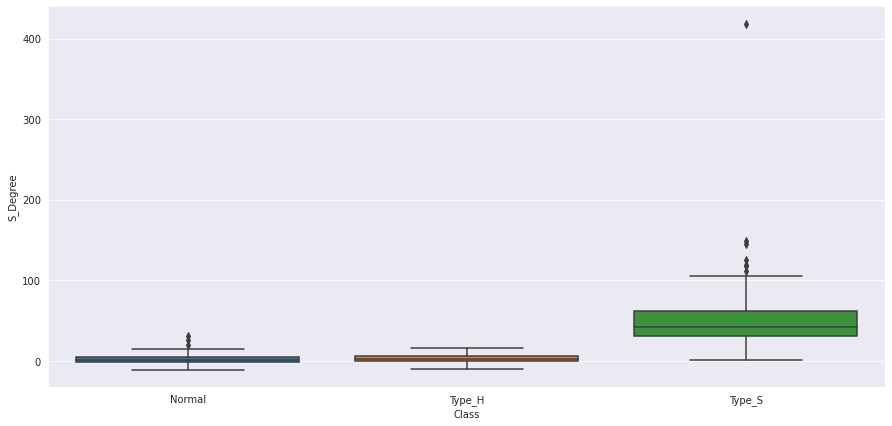

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

> **S_Degree has extreme values for type_S Class**

>**Few Normal class also has huge values for S_Degree**

# **Multivariate Analysis**

In [ ]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Pair Plot of independent Variables**

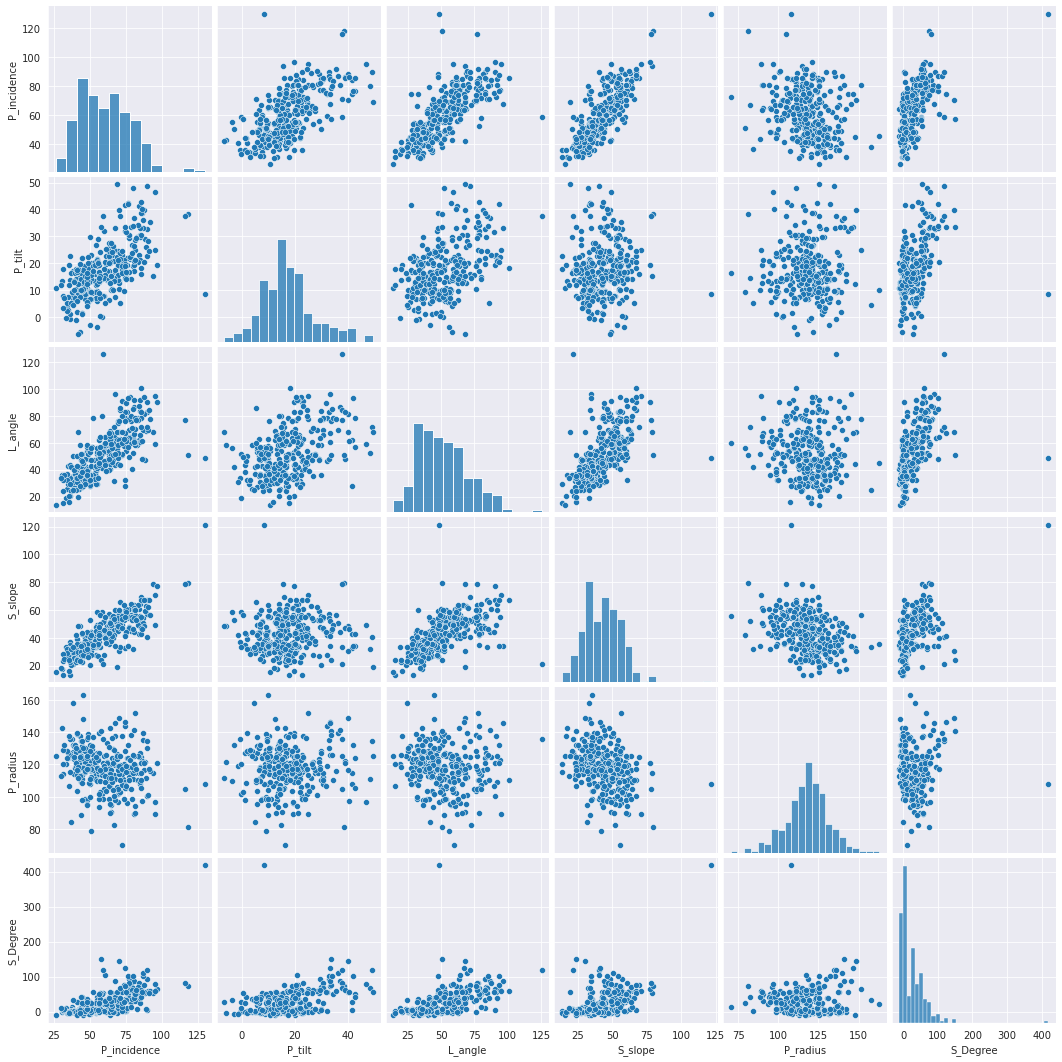

In [ ]:
sns.pairplot(df)
plt.show()

> **Along the diagonal we can see the distribution of individual variable**

> **P_incidence has  postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle**

> **P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius**

> **L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius**

> **s_slope has positive Relationship with L_angle and s_degree**

> **p_radius has no Relationship with s_degree,p_tilt,l_angle.**

> **S_degree has no strong positive Relationship with any of the variables.**

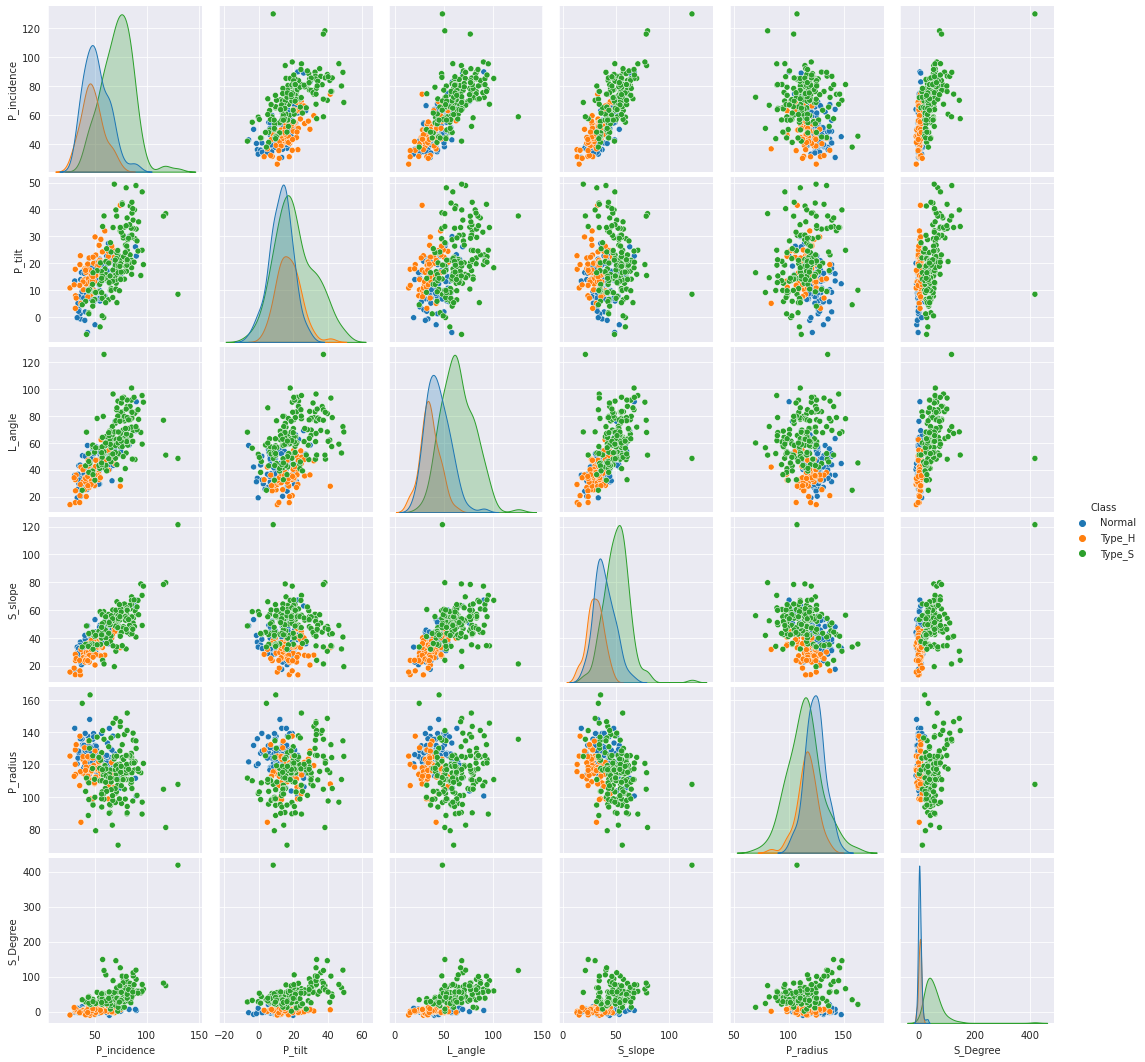

In [ ]:
sns.pairplot(df,hue='Class')

> **Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well**

> **It is evident that type_s class is more compared to other two**

> **Normal class has higher values compared to Type_H**

In [ ]:
class_summary=df.groupby('Class') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

Class  P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
0  Normal    51.685244  12.821414  43.542605  38.863830  123.890834   2.186572
1  Type_H    47.638407  17.398795  35.463524  30.239612  116.474968   2.480251
2  Type_S    71.514224  20.748038  64.110108  50.766186  114.518810  51.896687

**It is clear that s_Degree of Type_S contains larger values.**


# **Hypotesis Testing**

# Is the distribution of independent variables across normal,type_H and type_s, the same?

**Here we are using one-way anova to do statistical test.**

In [ ]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    print('{} Ho: Class types does not affect the {}'.format('\033[1m',i))
    print('\n')
    print('{} H1: Class types affect the {}'.format('\033[1m',i))
    print('\n')
    df_normal=df[df.Class=='Normal'][i]
    df_typeH=df[df.Class=='Type_H'][i]
    df_typeS=df[df.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[1m',f_stats))
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Class types has efect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 Ho: Class types does not affect the P_incidence


 H1: Class types affect the P_incidence


 F_stats: 98.53970917437489
 p_value: 8.752848964938295e-34
 Rejecting Null Hypothesis.Class types has efect on P_incidence


 Ho: Class types does not affect the P_tilt


 H1: Class types affect the P_tilt


 F_stats: 21.29919432898912
 p_value: 2.176879152985521e-09
 Rejecting Null Hypothesis.Class types has efect on P_tilt


 Ho: Class types does not affect the L_angle


 H1: Class types affect the L_angle


 F_stats: 114.98284047330316
 p_value: 5.357329394004833e-38
 Rejecting Null Hypothesis.Class types has efect on L_angle


 Ho: Class types does not affect the S_slope


 H1: Class types affect the S_slope


 F_stats: 89.64395329777523
 p_value: 2.175670364983569e-31
 Rejecting Null Hypothesis.Class types has efect on S_slope


 Ho: Class types does not affect the P_radius


 H1: Class types affect the P_radius


 F_stats: 16.86693475538487
 p_value: 1.1219959042394205e-07
 Rejecting Nul

**We can see class type affects each and every independent variables**

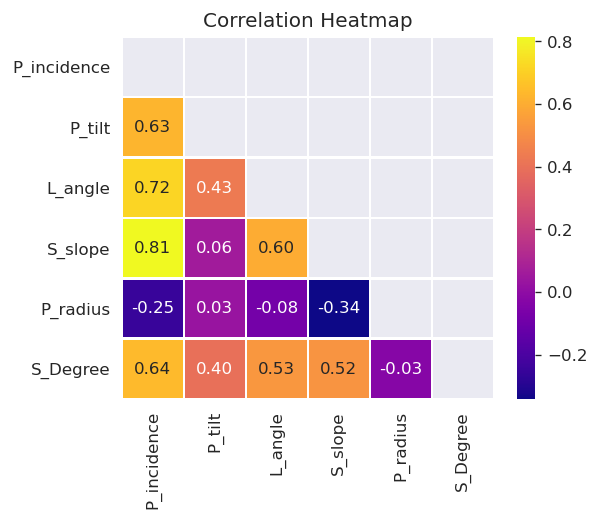

In [ ]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**Correlation between s_degree and p_incidence have high correlation.**

**S_degree and p_radius has negative correlation**

# 4. Data Pre-processing

# **Outlier Analysis**

**As we have seen in our EDA we have very less outliers which needs to be handled**

**We are imputing outiers with mean**

In [ ]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




> **We have imputed all outliers with mean value**

# **Encoding Target Variable**

In [ ]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

**Normal: 0**

**Type_H: 1**

**Type_S: 2**

In [ ]:
df['Class']=df['Class'].astype('category') #changing datatype to category.

# **Checking on Target Imbalance**

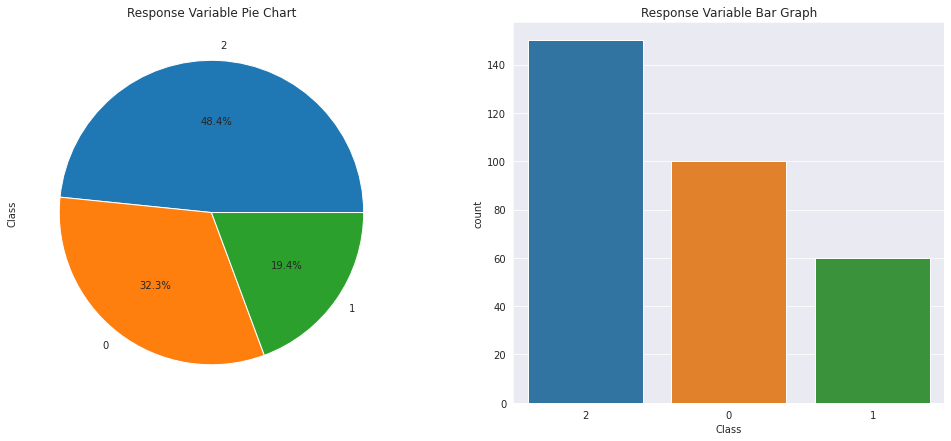

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**We have imbalanced target variable**

**Every class is not equally distributed.**

**48% of data is occupied by Type_S**

**When you have imbalance dataset model does not learn about less distributed classes. This gives
poor performance in unseen data**

# Train - Test Split

In [ ]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target

In [ ]:
X.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     59.893743   16.548519   51.689825   42.697607  118.061242   22.193516
std      16.139975    8.404101   18.071145   12.656481   11.342178   25.230932
min      26.147921   -5.845994   14.000000   13.366931   89.307547  -11.058179
25%      46.430294   10.705427   37.000000   33.347122  111.295804    1.603727
50%      58.691038   16.000000   49.562398   42.349084  118.000000   11.767934
75%      72.313279   21.021167   62.964777   52.475365  125.196027   38.144544
max      96.657315   38.750670  100.744220   79.695154  146.466001  100.292107

# **Scaling Independent Variables**

In [ ]:
X_Scaled=X.apply(zscore)

In [ ]:
X_Scaled.describe().T

count          mean       std       min       25%       50%  \
P_incidence  310.0 -6.159947e-17  1.001617 -2.094203 -0.835517 -0.074638   
P_tilt       310.0  5.241663e-17  1.001617 -2.669021 -0.696391 -0.065374   
L_angle      310.0  1.876635e-16  1.001617 -2.089008 -0.814203 -0.117915   
S_slope      310.0 -2.438909e-16  1.001617 -2.321190 -0.739985 -0.027582   
P_radius     310.0 -8.022257e-16  1.001617 -2.539211 -0.597449 -0.005408   
S_Degree     310.0 -1.130816e-16  1.001617 -1.320025 -0.817373 -0.413874   

                  75%       max  
P_incidence  0.770733  2.281479  
P_tilt       0.533059  2.646095  
L_angle      0.624929  2.718904  
S_slope      0.773799  2.927936  
P_radius     0.630066  2.508397  
S_Degree     0.633223  3.100356

> **We have scaled independent variables to corresponding z-score.**

> **We can see Mean becomes close to zero and Standard Deviation becomes 1**

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning

# **KNN Classifier**

**Basic Model**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [ ]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

# Classification Accuracy

In [ ]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8986175115207373
Accuracy on Test data: 0.7741935483870968


> **Training Acuracy is 0.89 and Testing Accuracy is 0.77. Performance is less in test data.**

> **This is due to overfitting of data**

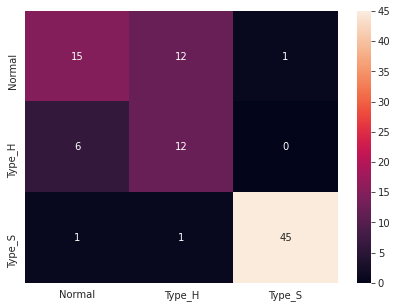

In [ ]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

> **Our model predicts Type_S correctly most of the time. Only two misclassification on this class**

> **Misclassification of labels are more when predicting normal class**

# Classification Report

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.48      0.67      0.56        18
           2       0.98      0.96      0.97        47

    accuracy                           0.77        93
   macro avg       0.71      0.72      0.71        93
weighted avg       0.79      0.77      0.78        93



> **Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly**

> **Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly**

> **class 0 predicted correctly for 68% of time. similary for class 1 48% and class 2 98%**

> **By F1 score we can say that precison and recall is balanced for class 0 by 60% and for class 1 by 56 %**

> **We have maximum F1 score for class 2.**

# **Finding best K value**

In [ ]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

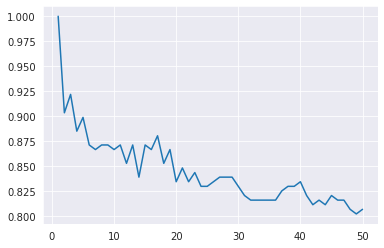

In [ ]:
plt.plot(range(1,51),train_score)
plt.show()

> **Here training accuracy decreases when increase k value**

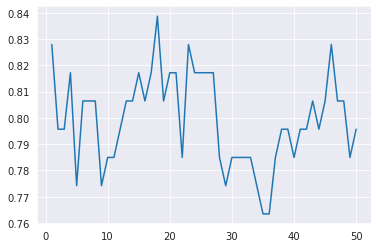

In [ ]:
plt.plot(range(1,51),test_score)
plt.show()

> **The maximum accuracy occures when k is less than 20.**

> **We will fix k value as less than 20.**

In [ ]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8279569892473119:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.58      0.78      0.67        18
           2       0.98      0.96      0.97        47

    accuracy                           0.83        93
   macro avg       0.78      0.79      0.78        93
weighted avg       0.84      0.83      0.83        93

Accuracy on Training data for k 3 is 0.9216589861751152:
Accuracy on Test data for k 3 is 0.7956989247311828:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.54      0.78      0.64        18
           2       0.98      0.94      0.96        47

    accuracy                           0.80        93
   macro avg       0.75      0.76      0.74        93
weighted avg       0.82      0.80     

> **For K=13 we have balanced train and test error**

> **we can use k value as 13 because when we increase this value the precision becomes100% for class 2**

# K-Fold CV for finding best model

In [ ]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.812903 (0.076063)
KNN: 0.832258 (0.059130)
NB: 0.816129 (0.038304)
SVM-linear: 0.841935 (0.068354)
SVM-poly: 0.822581 (0.069561)
SVM-rbf: 0.483871 (0.070674)


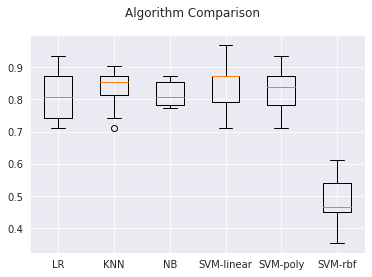

In [ ]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> **Accuracy is more for KNN,LR and svm-linear. However the standard deviation is less for svm-linear model.**

> **We can tell  svm-linear be a better algorithm for this dataset because of high accuracy and less Standard deviation**

**We will check with scaled values to see whether there is improvement in model**

LR: 0.854839 (0.076677)
KNN: 0.790323 (0.061629)
NB: 0.816129 (0.038304)
SVM-linear: 0.841935 (0.068354)
SVM-poly: 0.483871 (0.070674)
SVM-rbf: 0.483871 (0.070674)


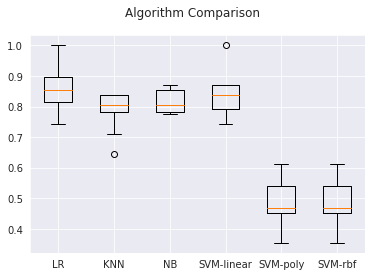

In [ ]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**When the scaled values are used instead of normal values Logistic regression is performing well.**

**Logistic Regression gives 81% accuracy with little standard deviation.**

# **6.Conclusion and improvisation:**

> **All the variables has significant effect on target class**

> **class belongs to type_s has higher mean value for alomst all variables**

> **Class belongs to normal has lower values for all variables**

> **For almost all variables the distribution is normal**

> **For Knn, k=13 we are getting balanced train and test error**

> **We can use KNN as a final model because of balanced train and test error also the recall and precision values are good**

> **Clear description on each variables may help to understand problem statement better because of medical domain**

**� CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.**

**� DATA DESCRIPTION: The data consists of the following attributes:**
1. **ID: Customer ID**
2. **Age Customer�s approximate age.**
3. **CustomerSince: Customer of the bank since. [unit is masked]**
4. **HighestSpend: Customer�s highest spend so far in one transaction. [unit is masked]**
5. **ZipCode: Customer�s zip code.**
6. **HiddenScore: A score associated to the customer which is masked by the bank as an IP.**
7. **MonthlyAverageSpend: Customer�s monthly average spend so far. [unit is masked]**
8. **Level: A level associated to the customer which is masked by the bank as an IP.**
9. **Mortgage: Customer�s mortgage. [unit is masked]**
10. **Security: Customer�s security asset with the bank. [unit is masked]**
11. **FixedDepositAccount: Customer�s fixed deposit account with the bank. [unit is masked]**
12. **InternetBanking: if the customer uses internet banking.**
13. **CreditCard: if the customer uses bank�s credit card.**
14. **LoanOnCard: if the customer has a loan on credit card.**

# Importing Necessary Packages

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# 1. Import and warehouse data:

**Dataset 1**

In [ ]:
df1=pd.read_csv('/content/Data1.csv')

**Checking First 5 Rows**

In [ ]:
df1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

**Shape of the dataset**

In [ ]:
df1.shape

(5000, 8)

In [ ]:
df1.head() #checking sample 5 records

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

**We have 8 columns and 5000 rows**

**Dataset-2**

In [ ]:
df2=pd.read_csv('/content/Data2.csv')

**Shape of the dataset**

In [ ]:
df2.shape

(5000, 7)

**We have 7 columns and 5000 rows**

In [ ]:
df2.head() #checking first 5 records

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

# Merging the dataset

In [ ]:
df=df1.merge(df2,left_on='ID',right_on='ID') #id is common in both dataframe

In [ ]:
df.shape

(5000, 14)

**Final Dataframe has 14 columns and 5000 rows**

In [ ]:
df.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

# 2. Data Cleansing

**Checking the datatypes**

In [ ]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**Changing datatypes of categorical features**

In [ ]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

In [ ]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

**We can see all categorical columns datatypes are changed**

**Checking the information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


**Target variable Loanoncard having few missing records**

In [ ]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**We have very less missing value so we will drop the missing records.**

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**All the missing records are dropped**

**Id column is not useful in model building so dropping that feature**

In [ ]:
df.drop('ID',axis=1,inplace=True)

# 3.Data Analysis & Visulaization

**5 Point summary**

In [ ]:
df.describe()

Age  CustomerSince  HighestSpend       ZipCode  \
count  4980.000000    4980.000000    4980.00000   4980.000000   
mean     45.352610      20.117671      73.85241  93152.420482   
std      11.464212      11.468716      46.07009   2123.660073   
min      23.000000      -3.000000       8.00000   9307.000000   
25%      35.000000      10.000000      39.00000  91911.000000   
50%      45.000000      20.000000      64.00000  93407.000000   
75%      55.000000      30.000000      98.00000  94608.000000   
max      67.000000      43.000000     224.00000  96651.000000   

       MonthlyAverageSpend     Mortgage  
count          4980.000000  4980.000000  
mean              1.939536    56.589759  
std               1.750006   101.836758  
min               0.000000     0.000000  
25%               0.700000     0.000000  
50%               1.500000     0.000000  
75%               2.525000   101.000000  
max              10.000000   635.000000

**Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness**

**Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist**

**We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers**

# Univariate Analysis

**Distribution and outlier analysis of numerical variables**

**Age**

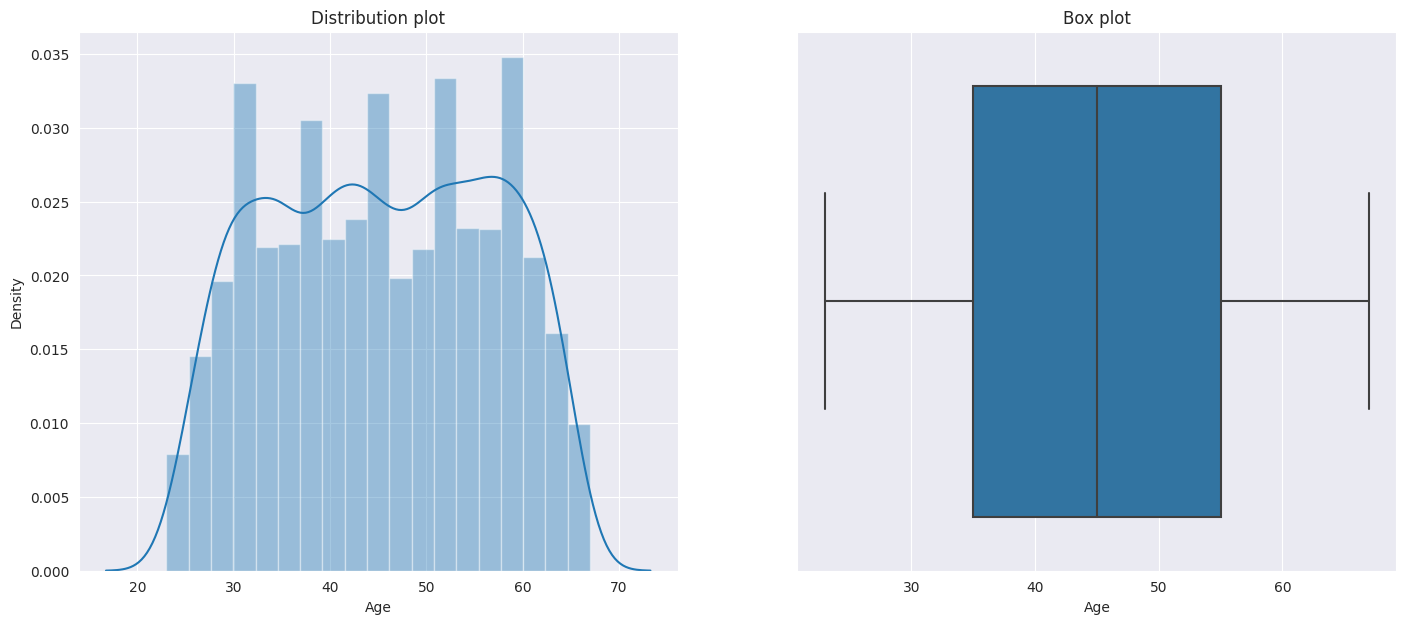

 Total Number of outliers in Age: 0


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

> **There is normality maintained in age column. Center area is little wider.**

> **People with age between 35 to 65 are more**

> **We have no outliers in this column**

**CustomerSince**

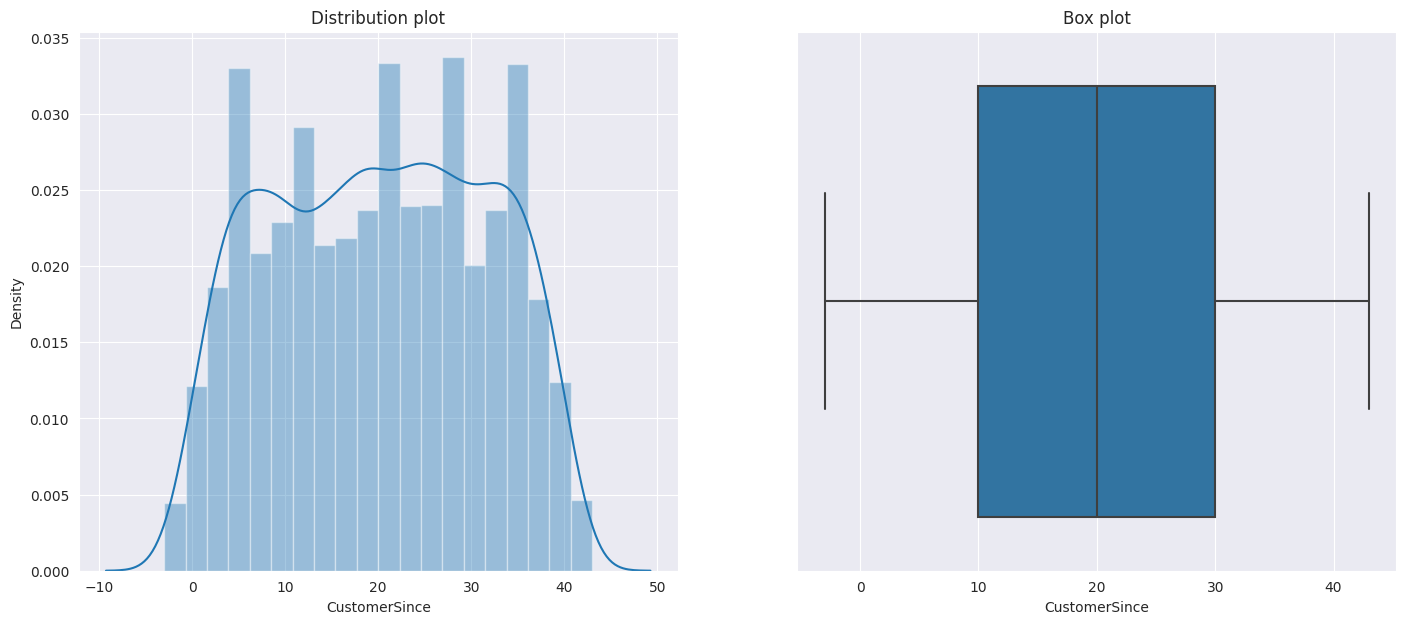

 Total Number of outliers in CustomerSince: 0


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

> **Most of the people became customer of bank between 10 to 30. Here the units are masked**

>**We have no outliers**

**HighestSpend**

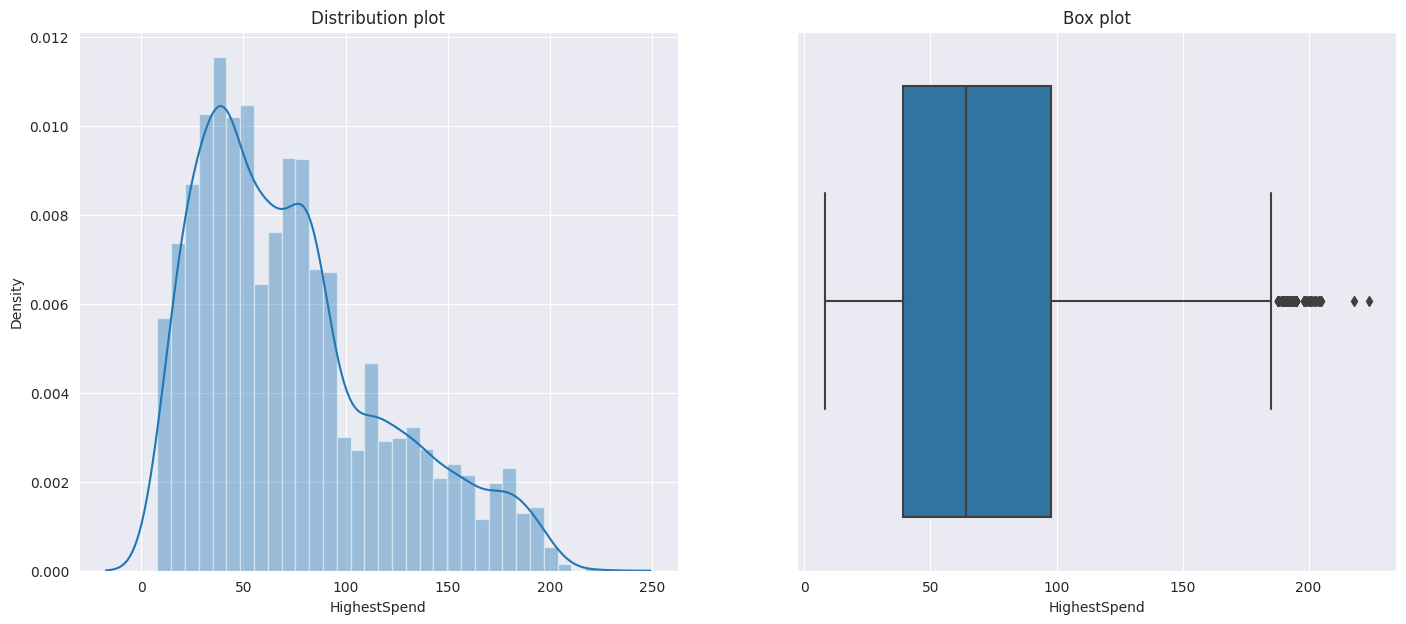

 Total Number of outliers in HighestSpend: 96


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['HighestSpend'],25),np.percentile(df['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

>**We can see positive skewness in the data**

> **In one transaction highest spend amount is between 45 to 100. Here the units are masked**

>**We can see 96 Outliers. Few customers spent more than 200 as well**

**MonthlyAverageSpend**

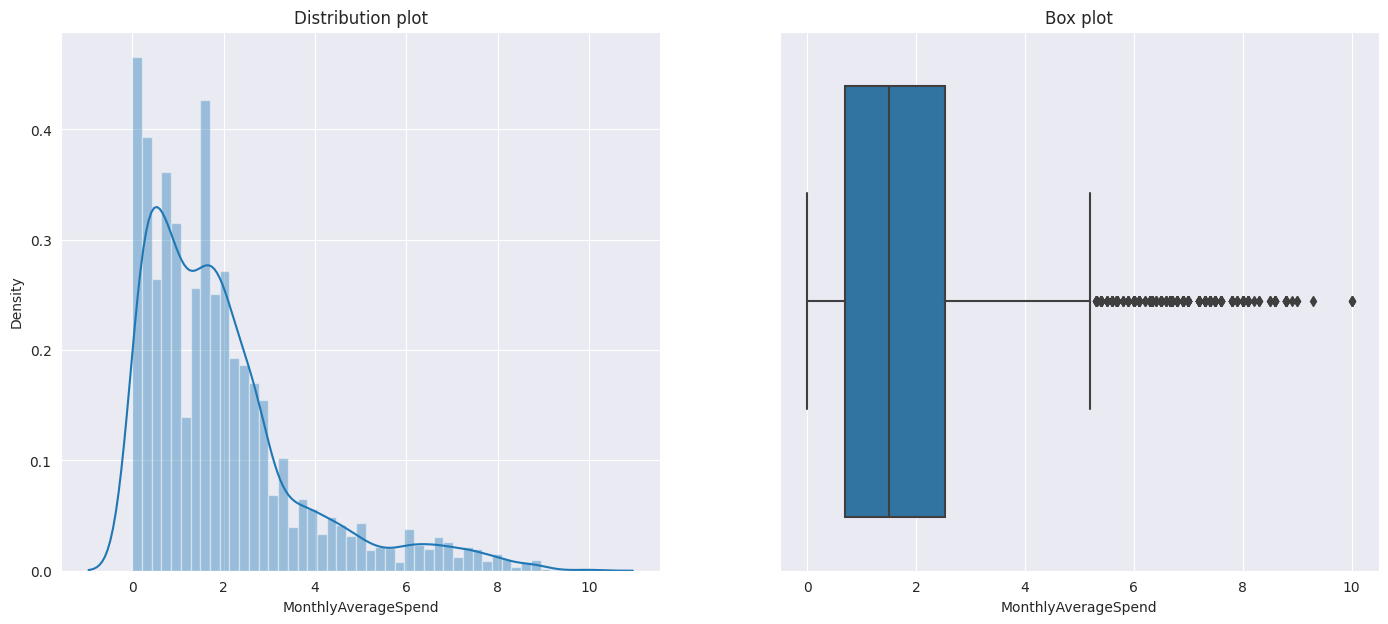

 Total Number of outliers in MonthlyAverageSpend: 324


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

> **We can see huge positive skewness in the data**

> **Monthly average spend of the customer are mostly between 1 to 3(Units are masked)**

> **There is more number of outliers.This tells some customers spent huge amount as well**

**ZipCode**

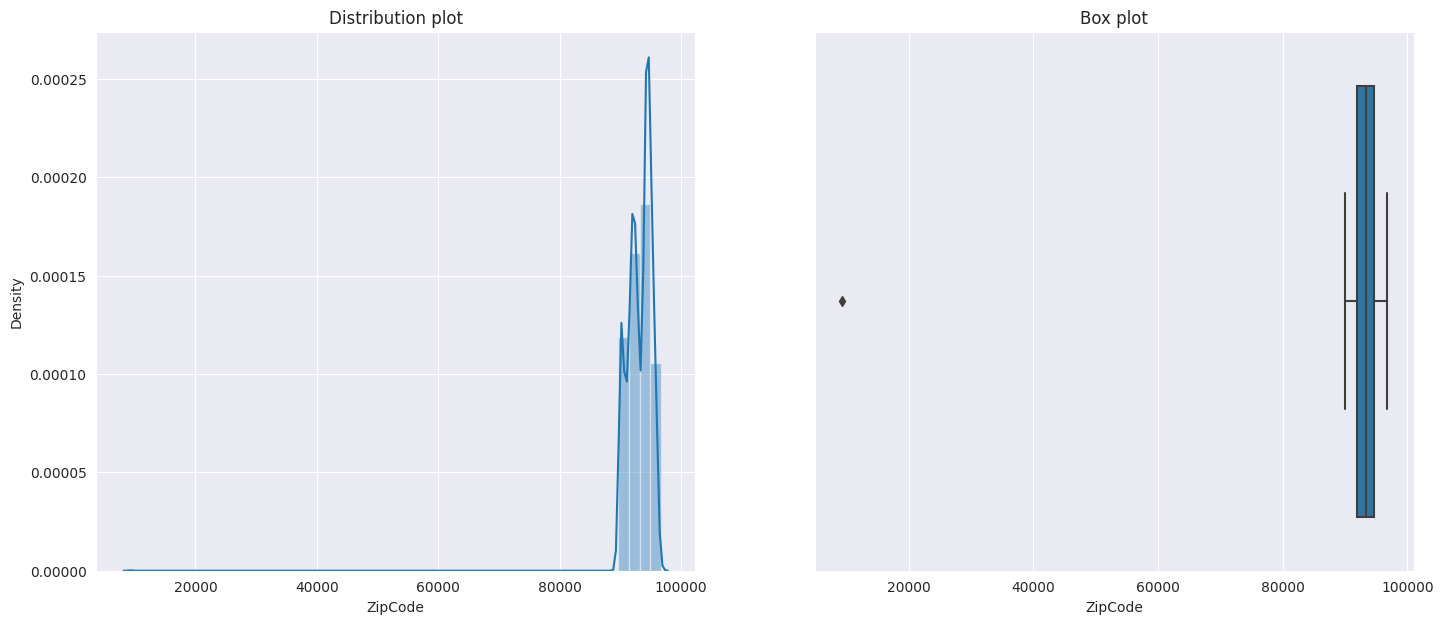

 Total Number of outliers in ZipCode: 1


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))

> **Most of the zipcodes are appeared once.**

> **There is no proper distribution**

> **This column does not add value to the model. We will drop during model building**

**Mortgage** 

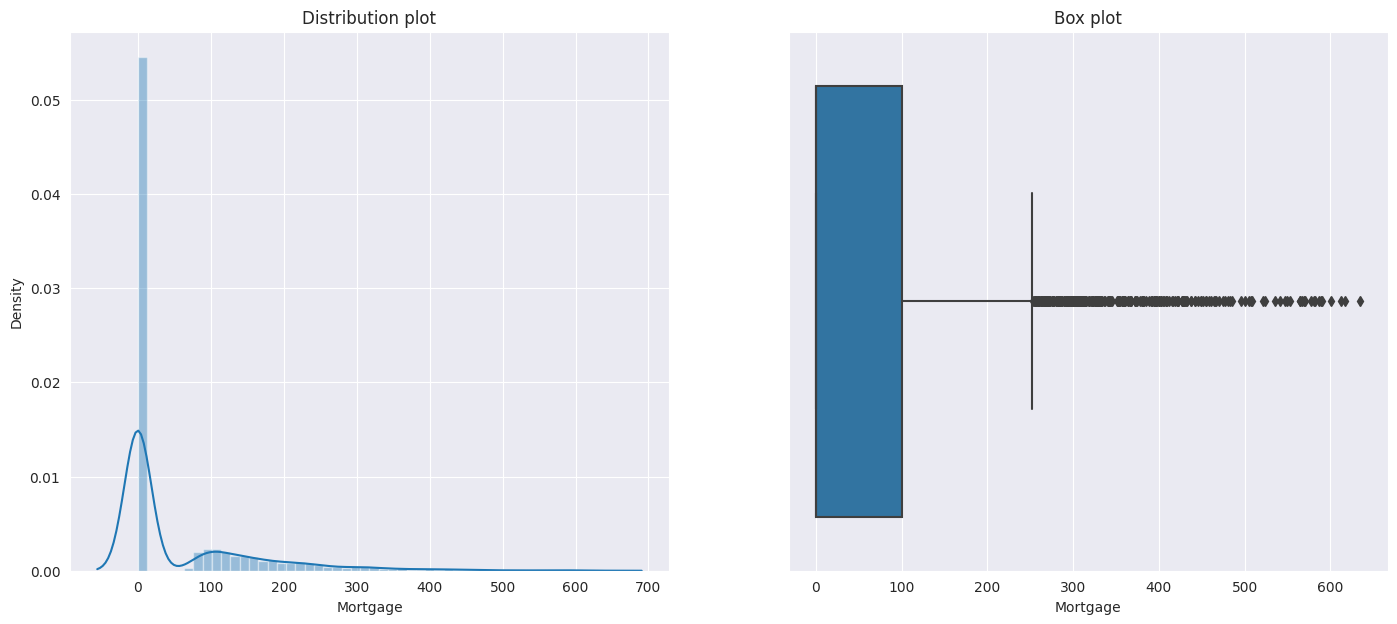

 Total Number of outliers in Mortgage: 291


In [ ]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

> **Most of cases we have zero as value this tell most of the cutomer doest have mortage.**

> **we can see there is no proper distribution.**

**Distribution of categorical variables**

**HiddenScore**

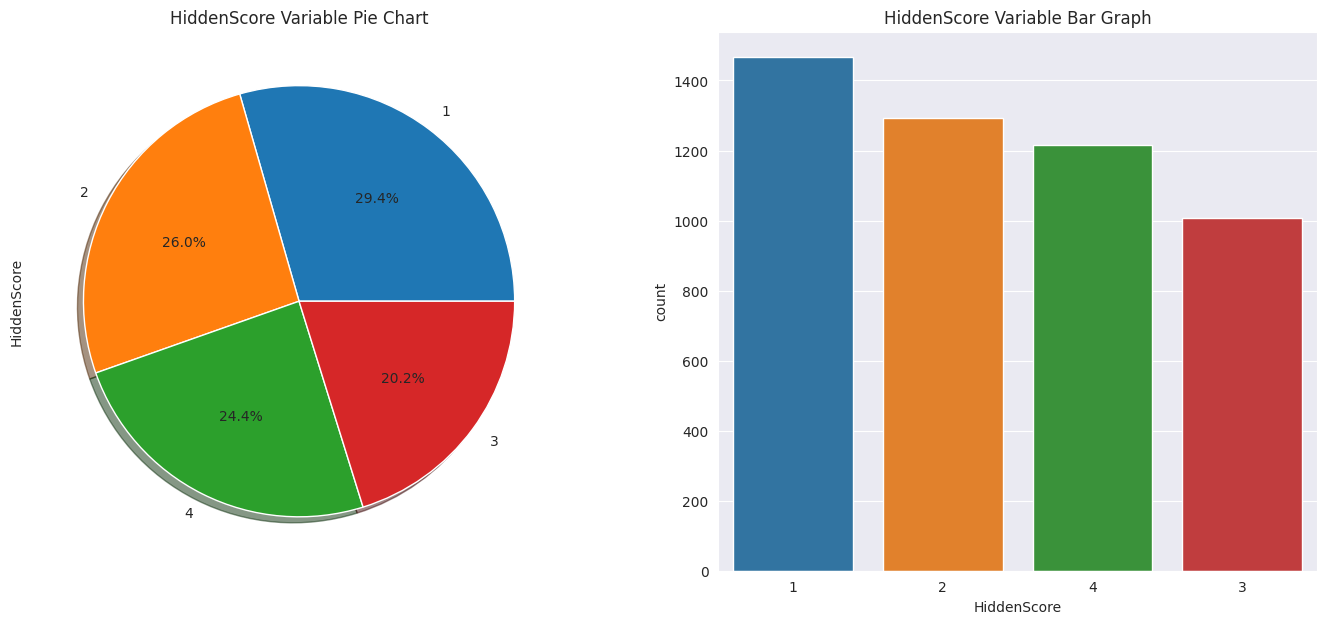

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='HiddenScore',data=df,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

**We can see nearly equal distribution of each category**

**Level**

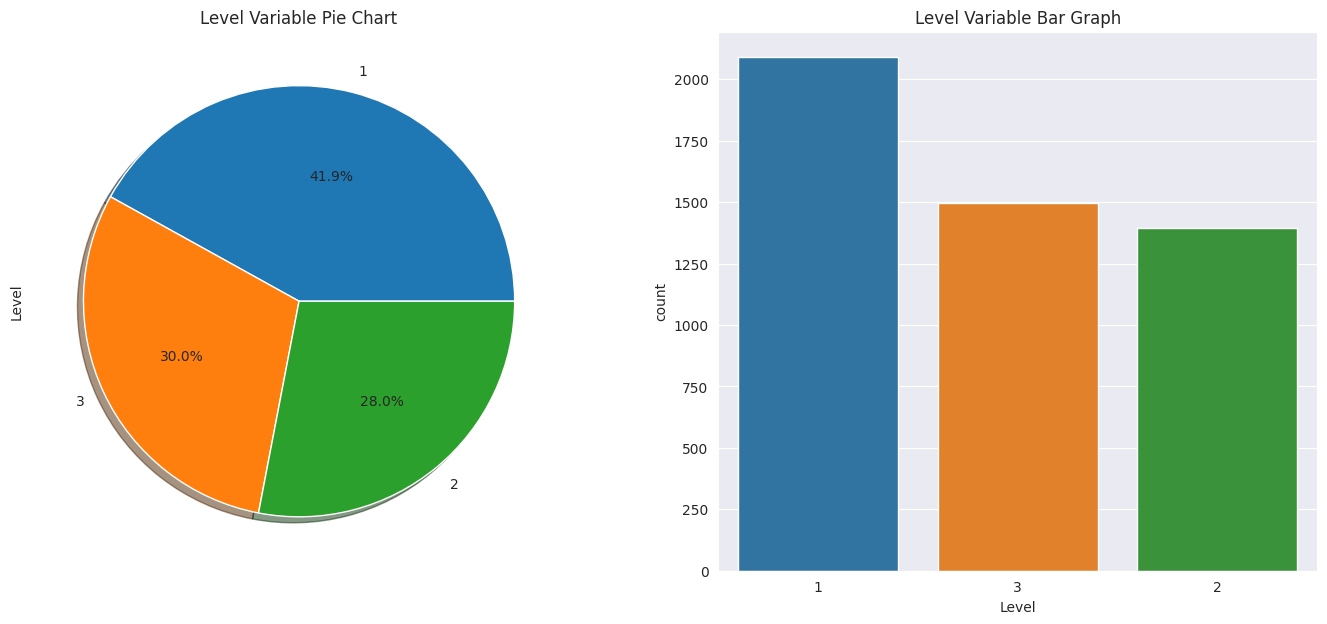

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='Level',data=df,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

> **Level 2 and 3 has nearly equal distribution**

> **Level 1 customers are more compared to others**

**FixedDepositAccount**

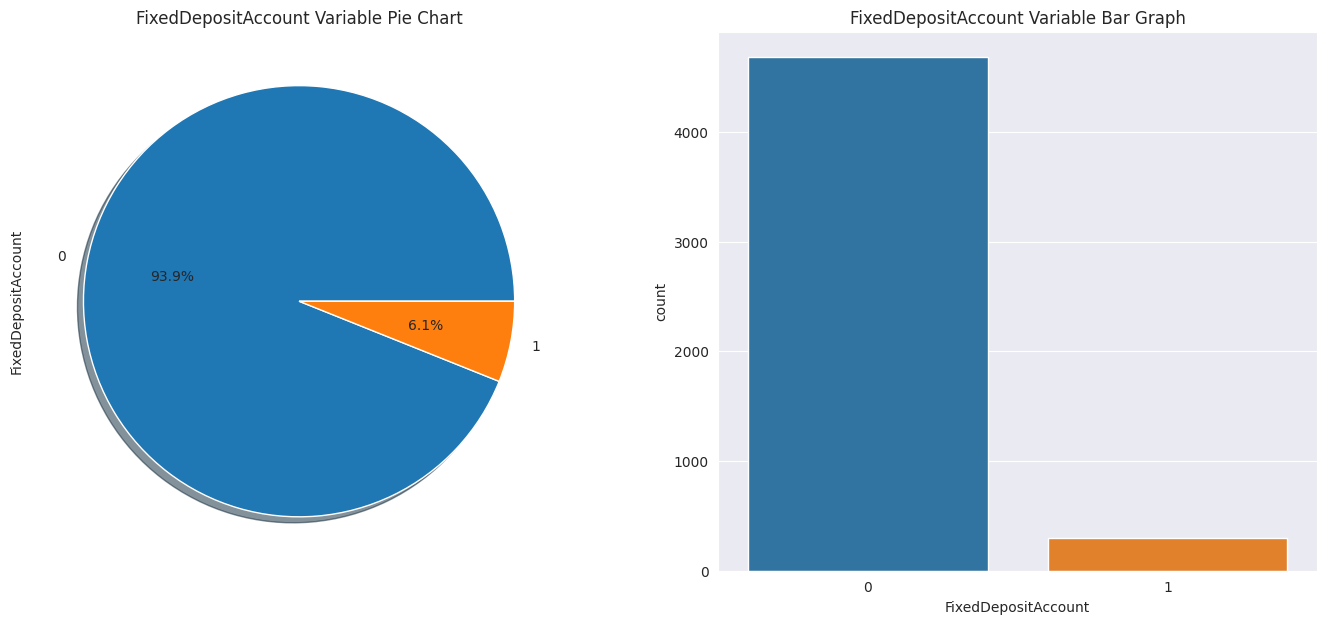

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='FixedDepositAccount',data=df,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

> **We can see 93.9% of customers does not have fixed deposit account**

**InternetBanking**

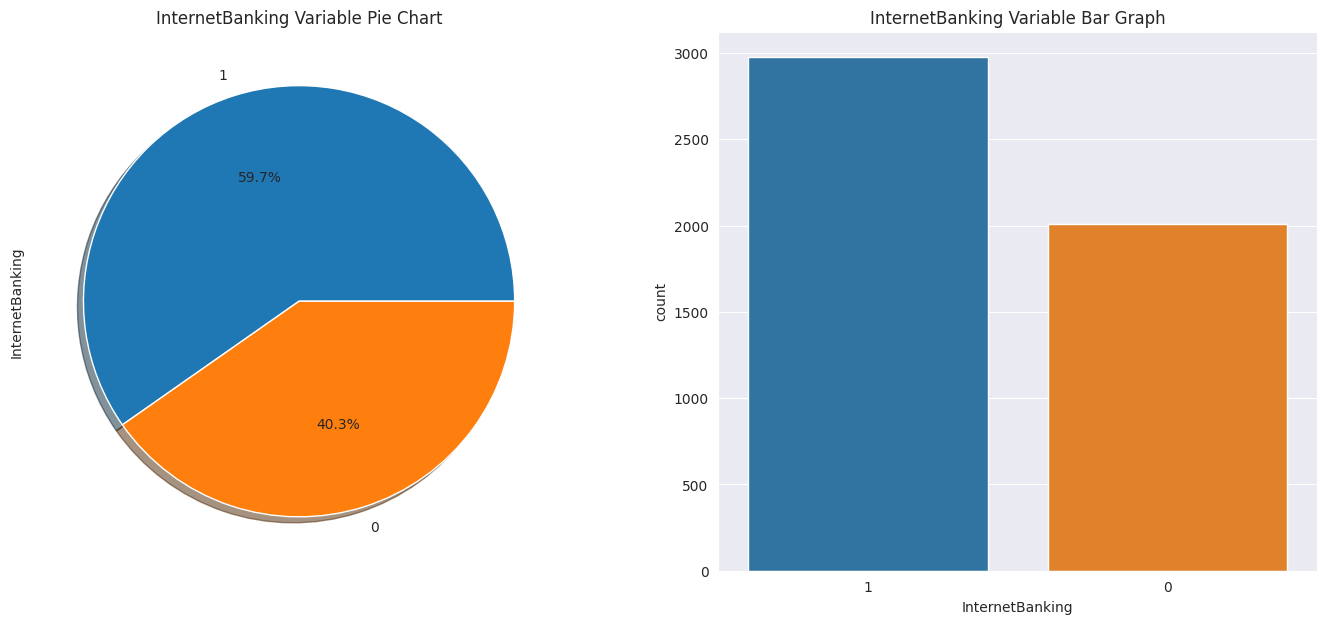

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='InternetBanking',data=df,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

> **60 % of people uses internet banking**

**CreditCard**

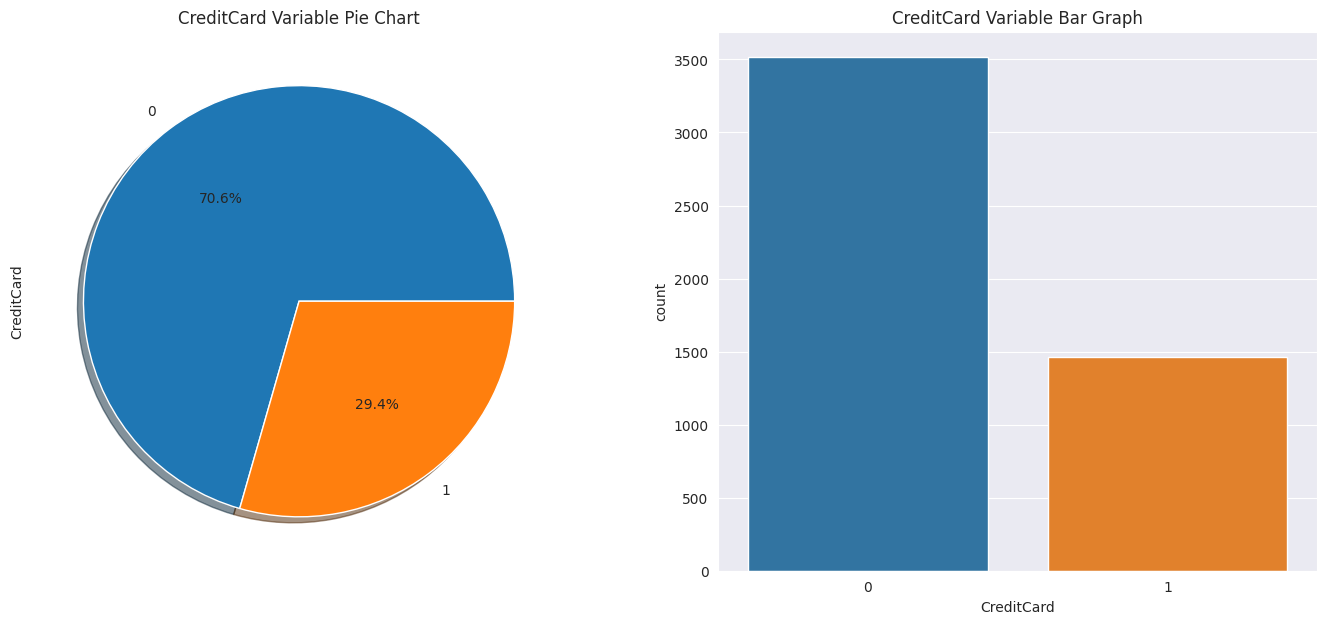

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='CreditCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

> **70 % of people uses bank's credit card**

**LoanOnCard**

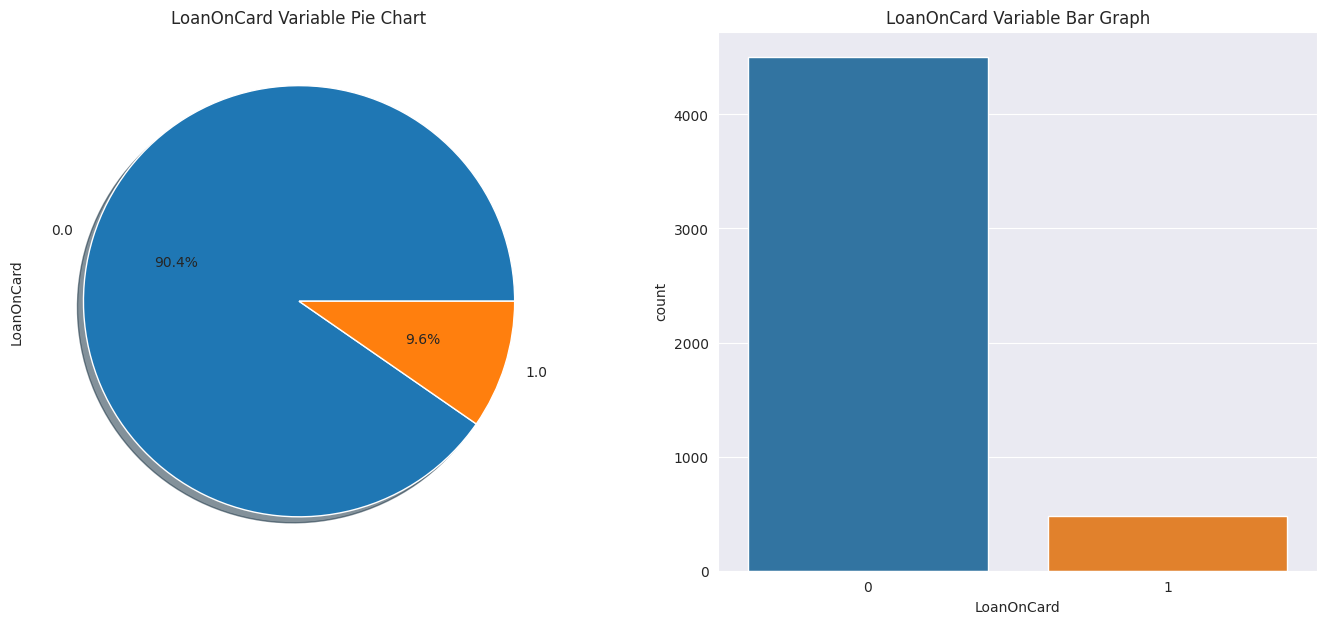

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x='LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

> **We can see 90% of people does not have loan on credit card**

 # **Bi Variate Analysis**

**Numerical vs Category**

**LoanOnCard vs CustomerSince**

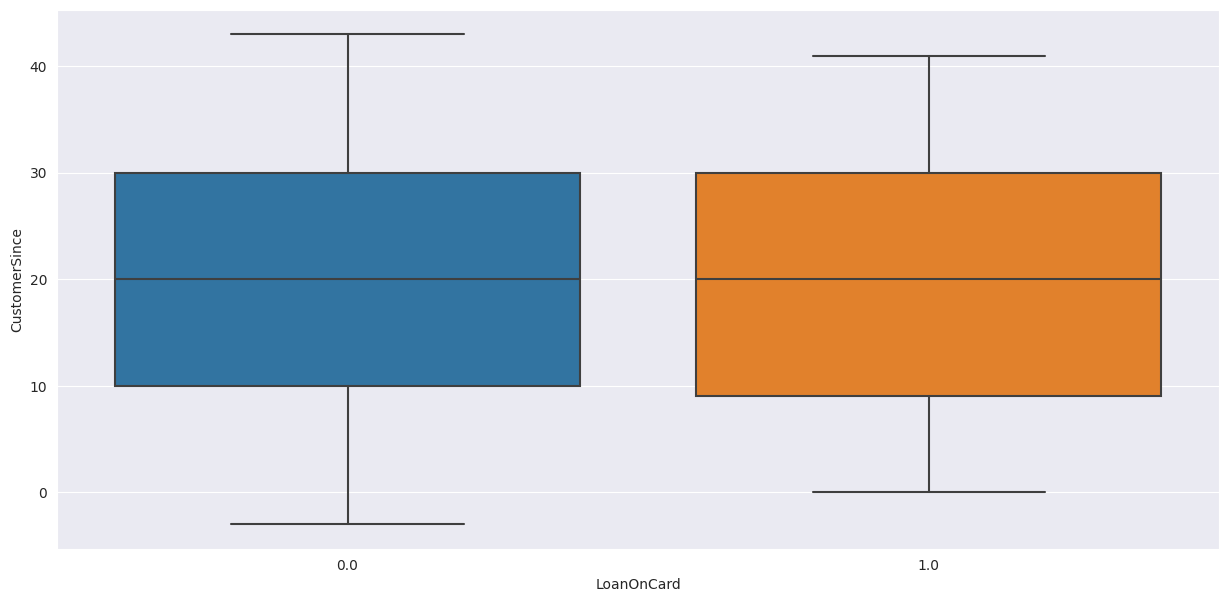

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

> **Customer of the bank since has equal distribution on loan holders and non-loan holders.**

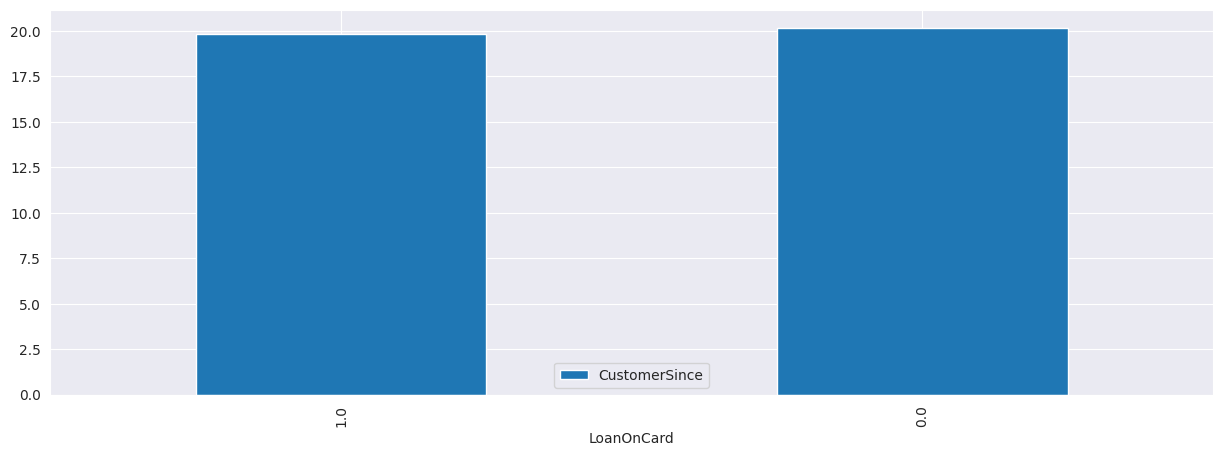

In [ ]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

> **Mean values are nearly equal for both loan holders and non loan holders**

**HighestSpend vs LoanOnCard**

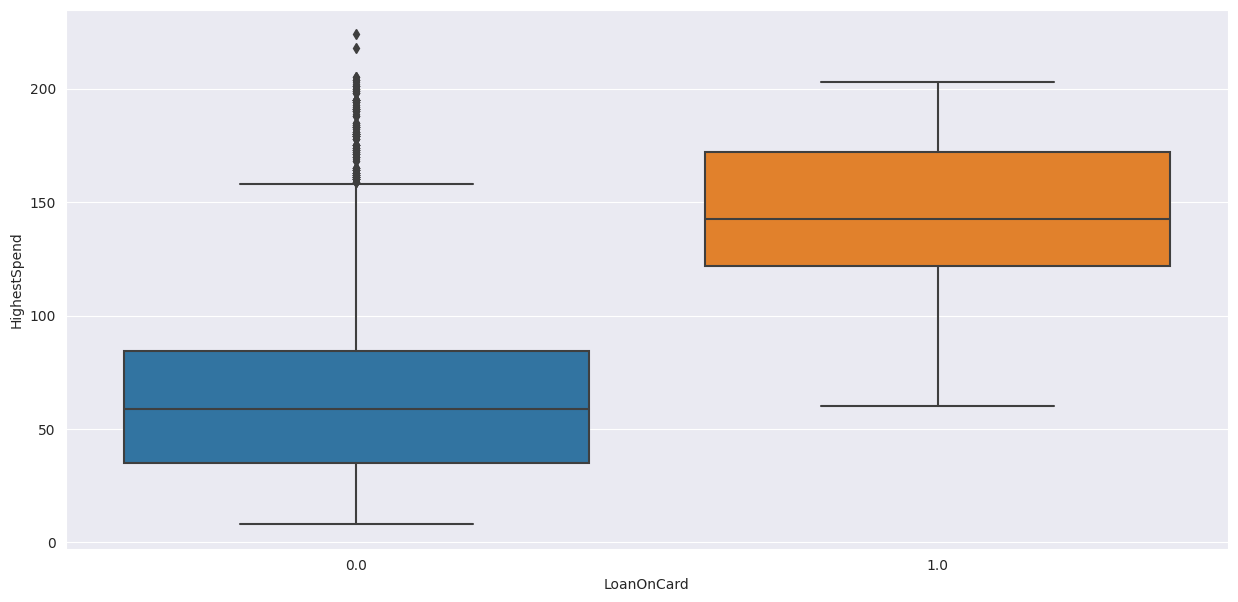

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df)
plt.show()

> **It is evident that people having loan on card spends more than who doesn't have**

>**Some customer who does not have loan also spends more sometimes.**

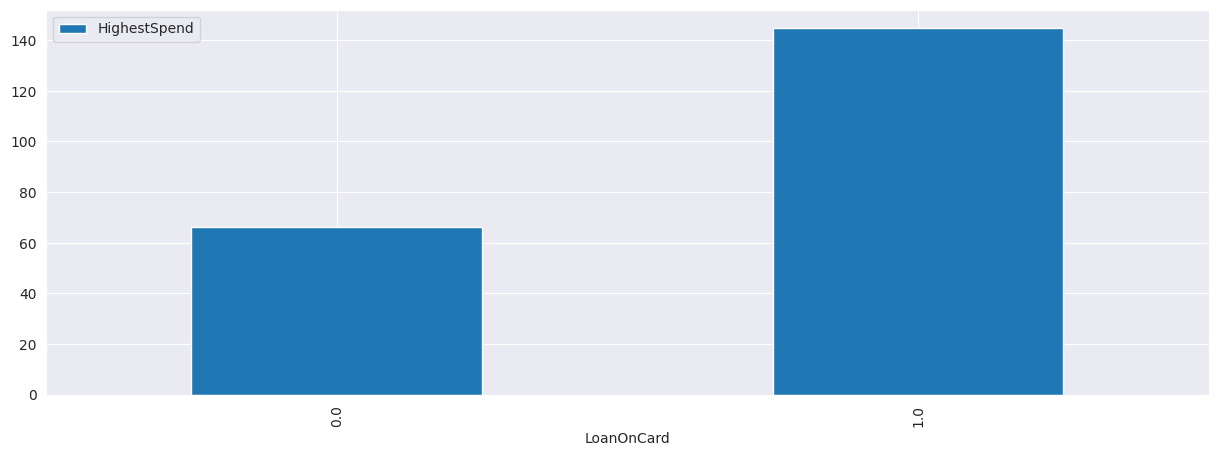

In [ ]:
df.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mean value of highest spend is more for loan holders**

**MonthlyAverageSpend vs LoanOnCard**


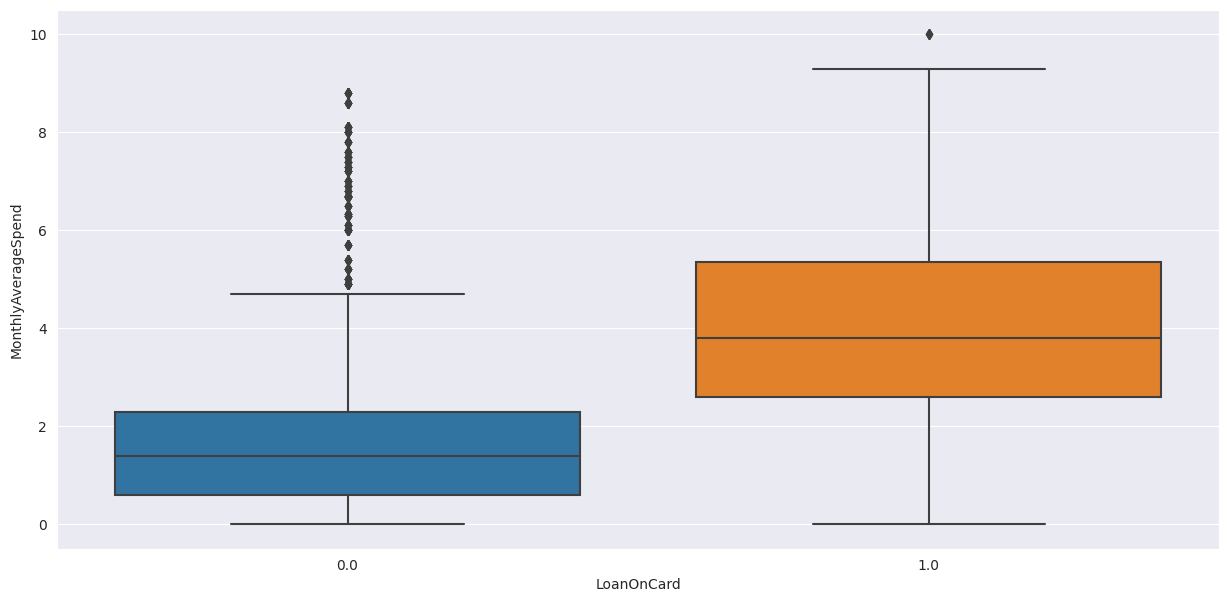

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df)
plt.show()

> **Monthly average spend is more for loan holders**

> **This column is directly proportional to highest spend**

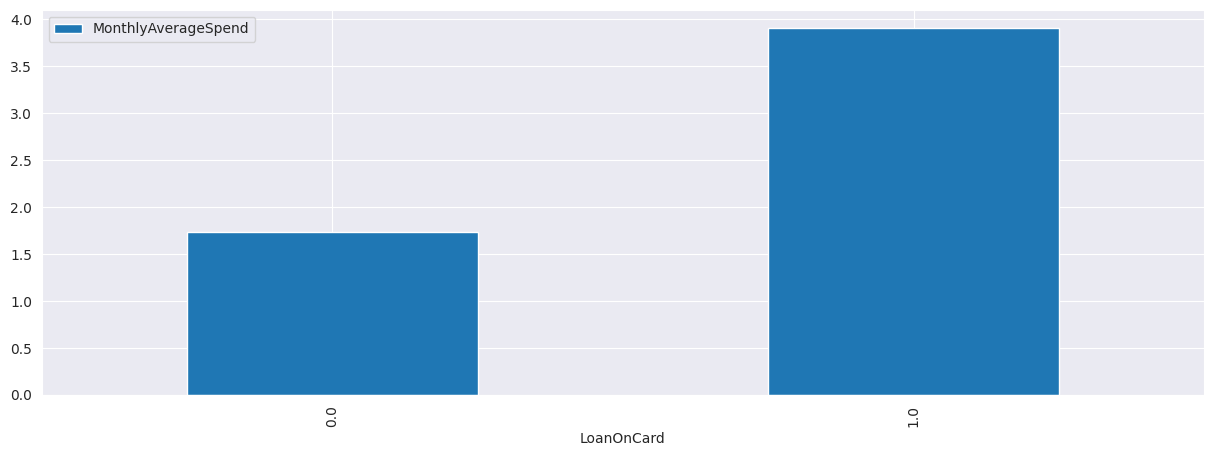

In [ ]:
df.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Average spend mean values are more for loan holders.**

**Mortgage vs LoanOnCard**

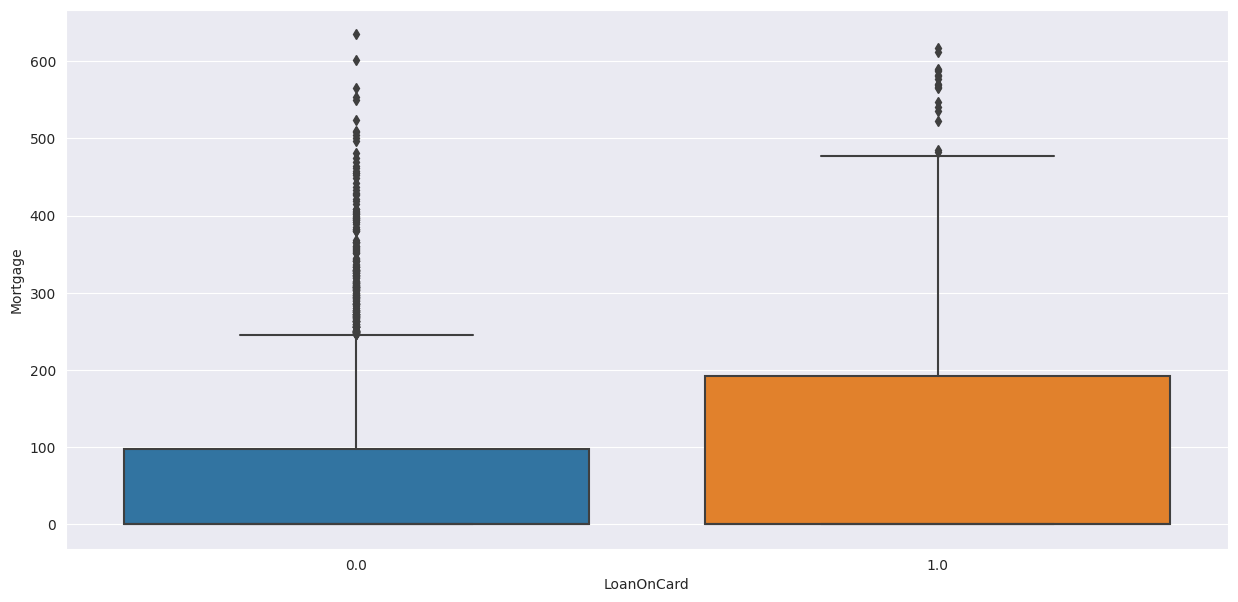

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

> **Mortage value is high for loan holders**

> **We can see extreme value in both the cases**

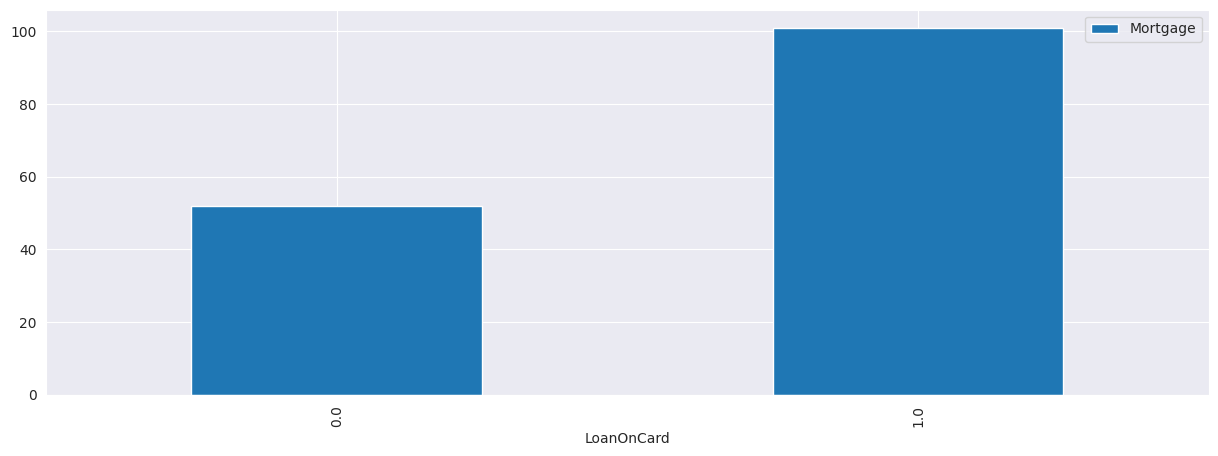

In [ ]:
df.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mortgage Mean values are more for loan holders**

**Age vs LoanOnCard**

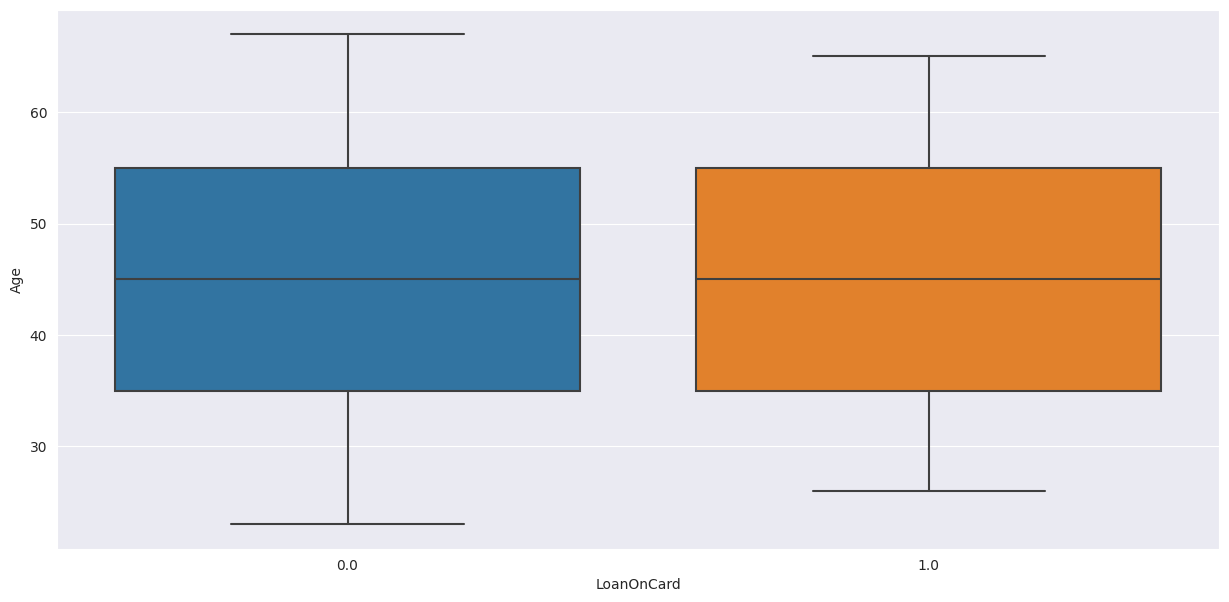

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df)
plt.show()

> **Age distribution is nearly equal for both loan holders and non-loan holders**

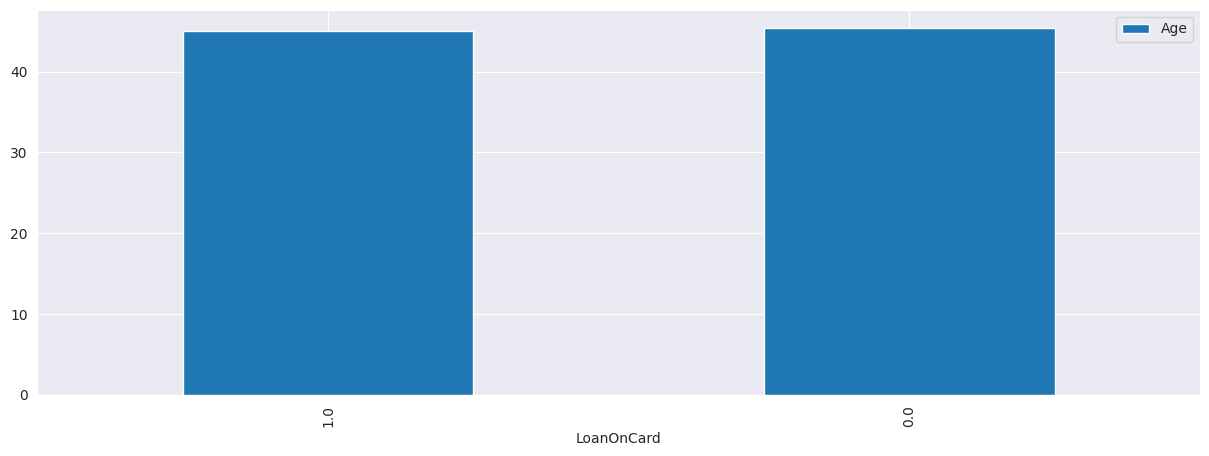

In [ ]:
df.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mean values are nearly equal so age is not affected for taking loans**

**Numerical vs Numerical**

**MonthlyAverageSpend vs HighestSpend**

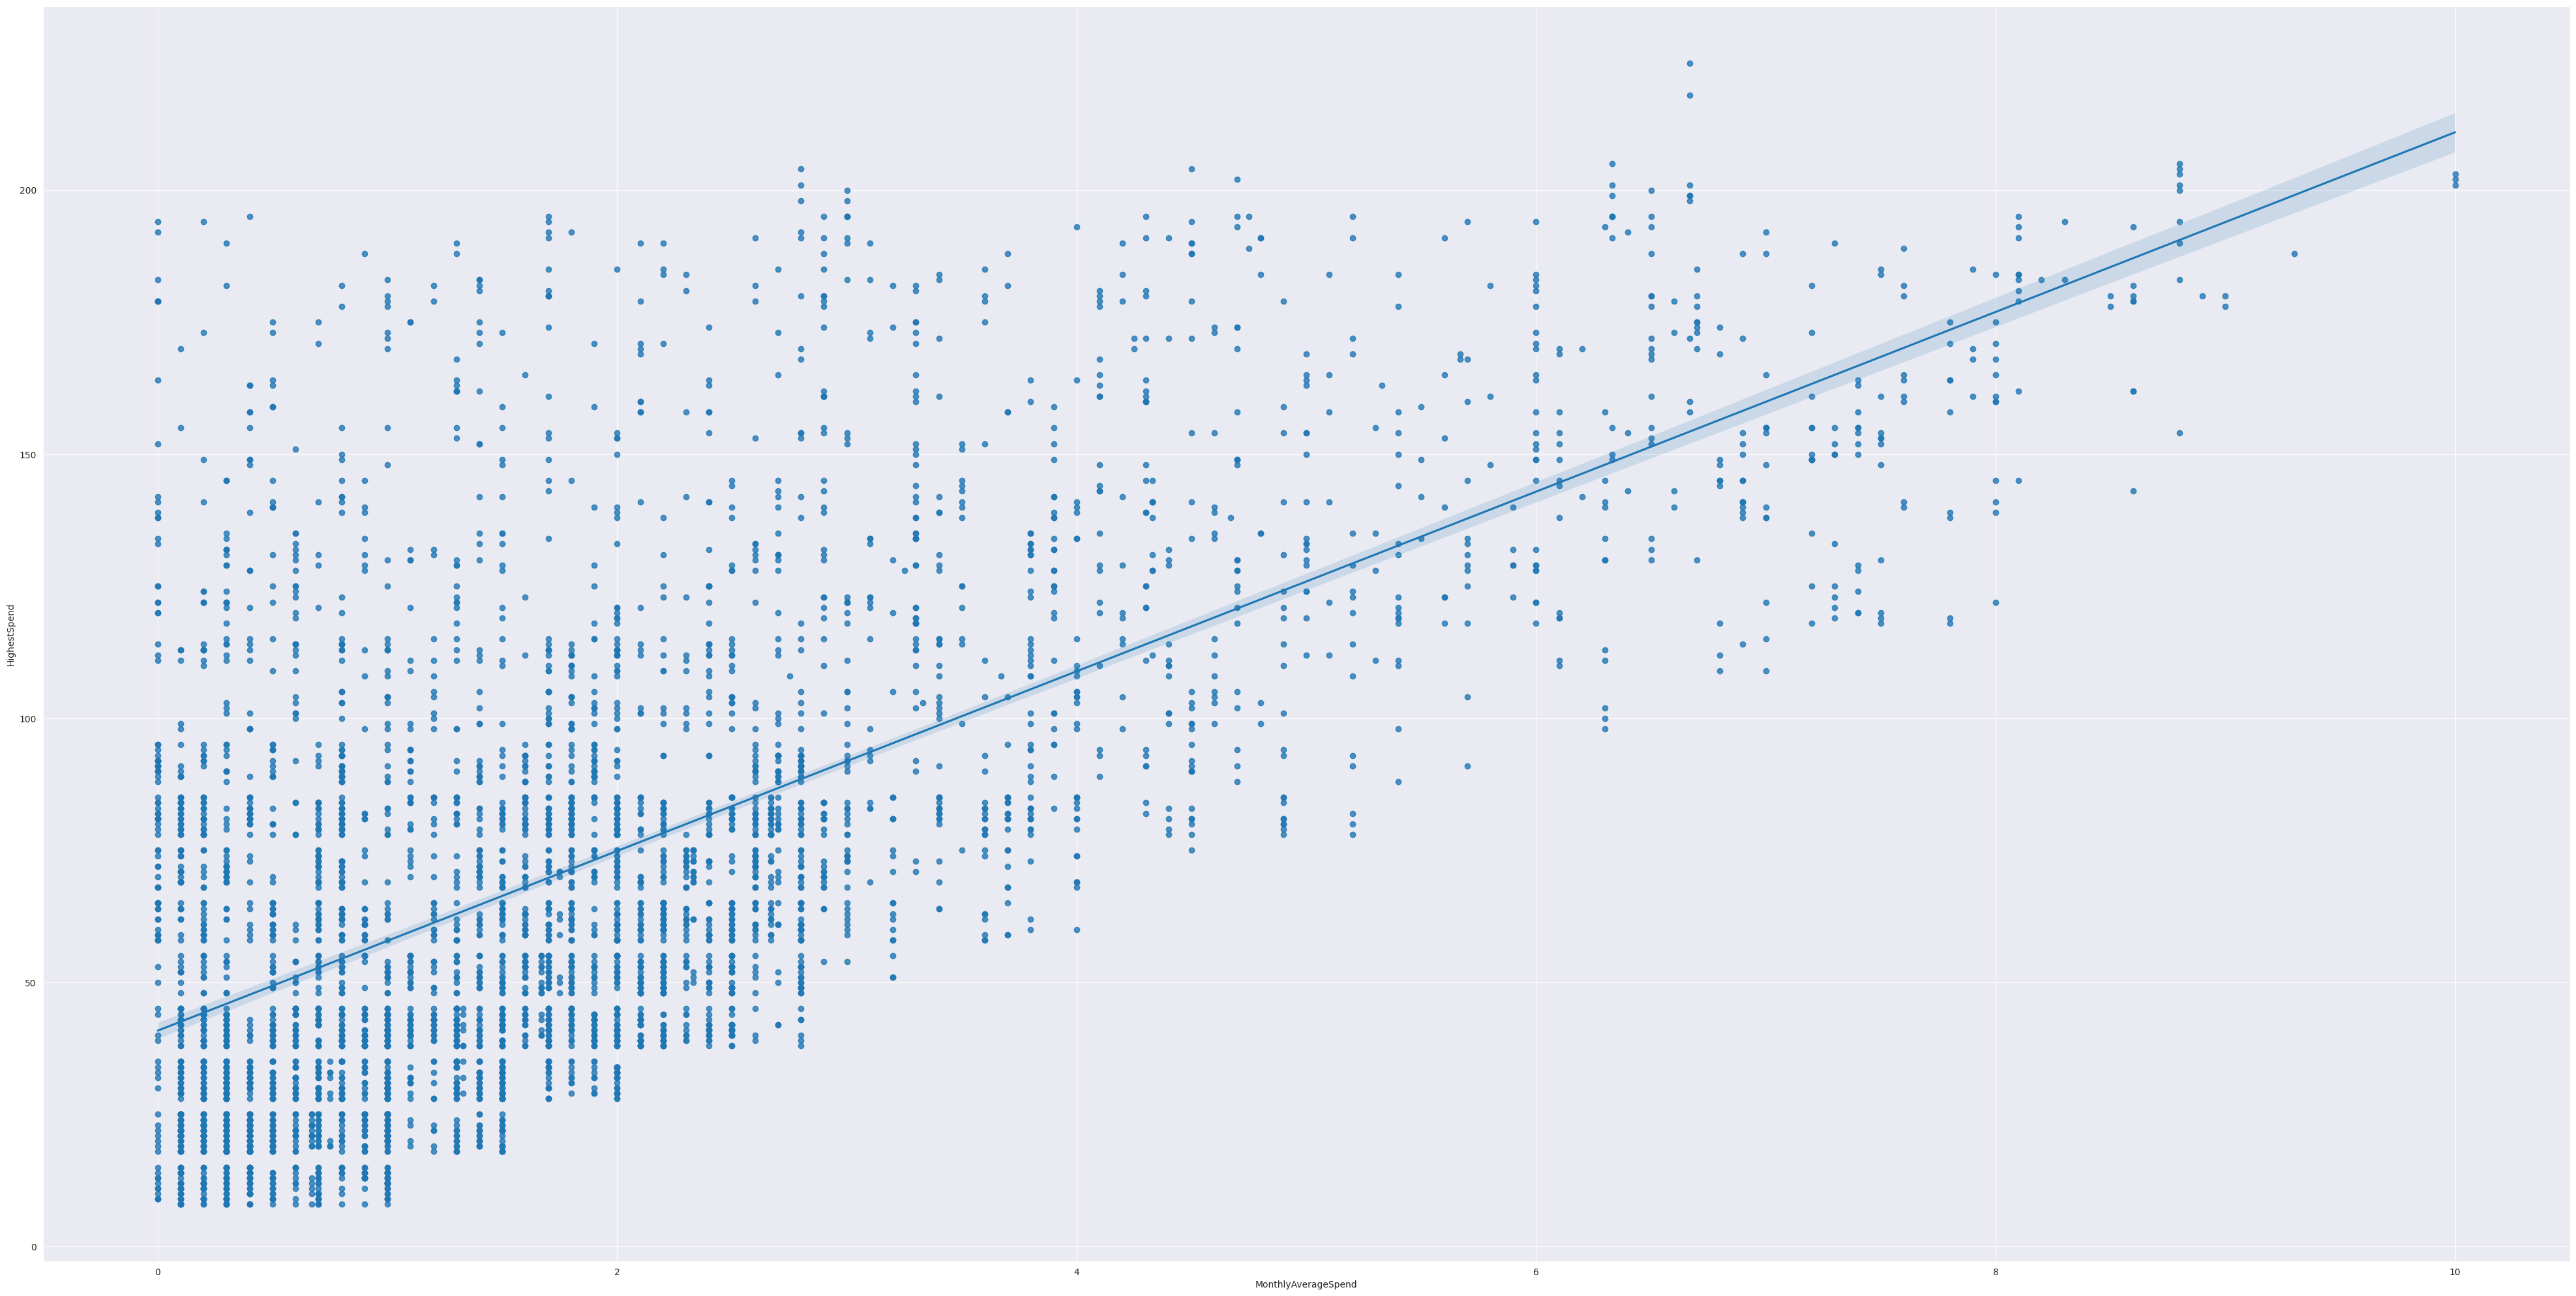

In [ ]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='MonthlyAverageSpend',y='HighestSpend', data=df) # regression plot - scatter plot with a regression line

> **There is clear linear relationship between Monthly average spend and highest spend.**

**Age vs MonthlyAverageSpend**

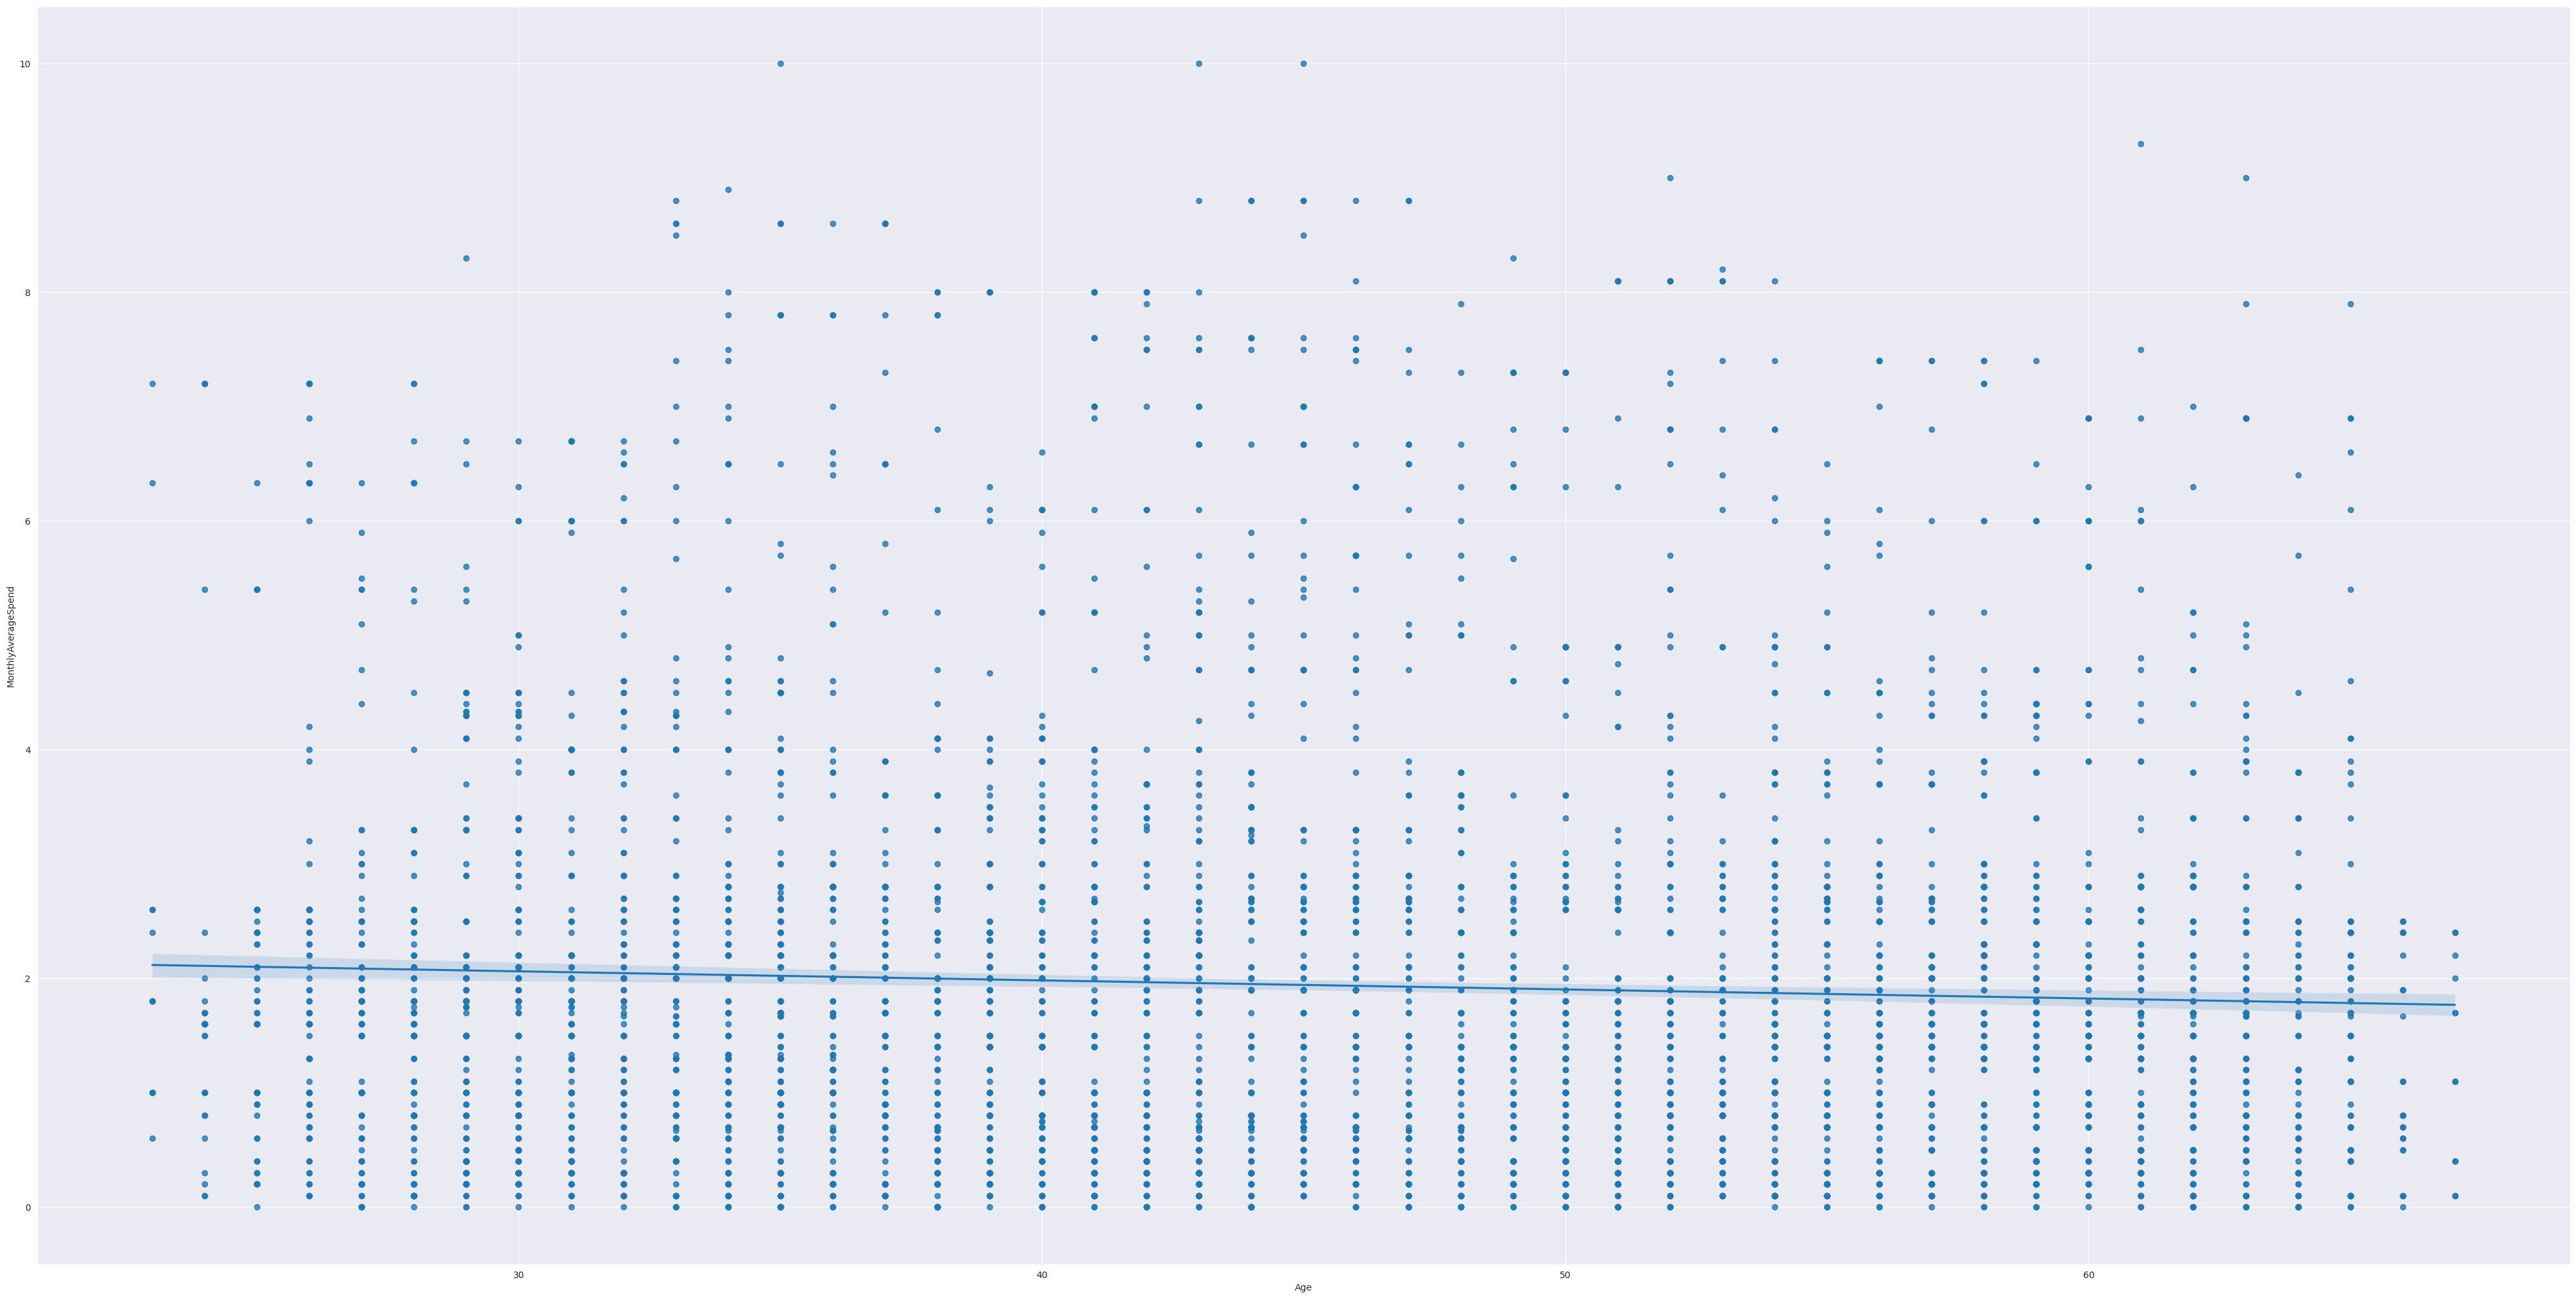

In [ ]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='Age',y='MonthlyAverageSpend', data=df) # regression plot - scatter plot with a regression line

> **Age does not have any relationship with spend.**

**CustomerSince vs MonthlyAverageSpend**

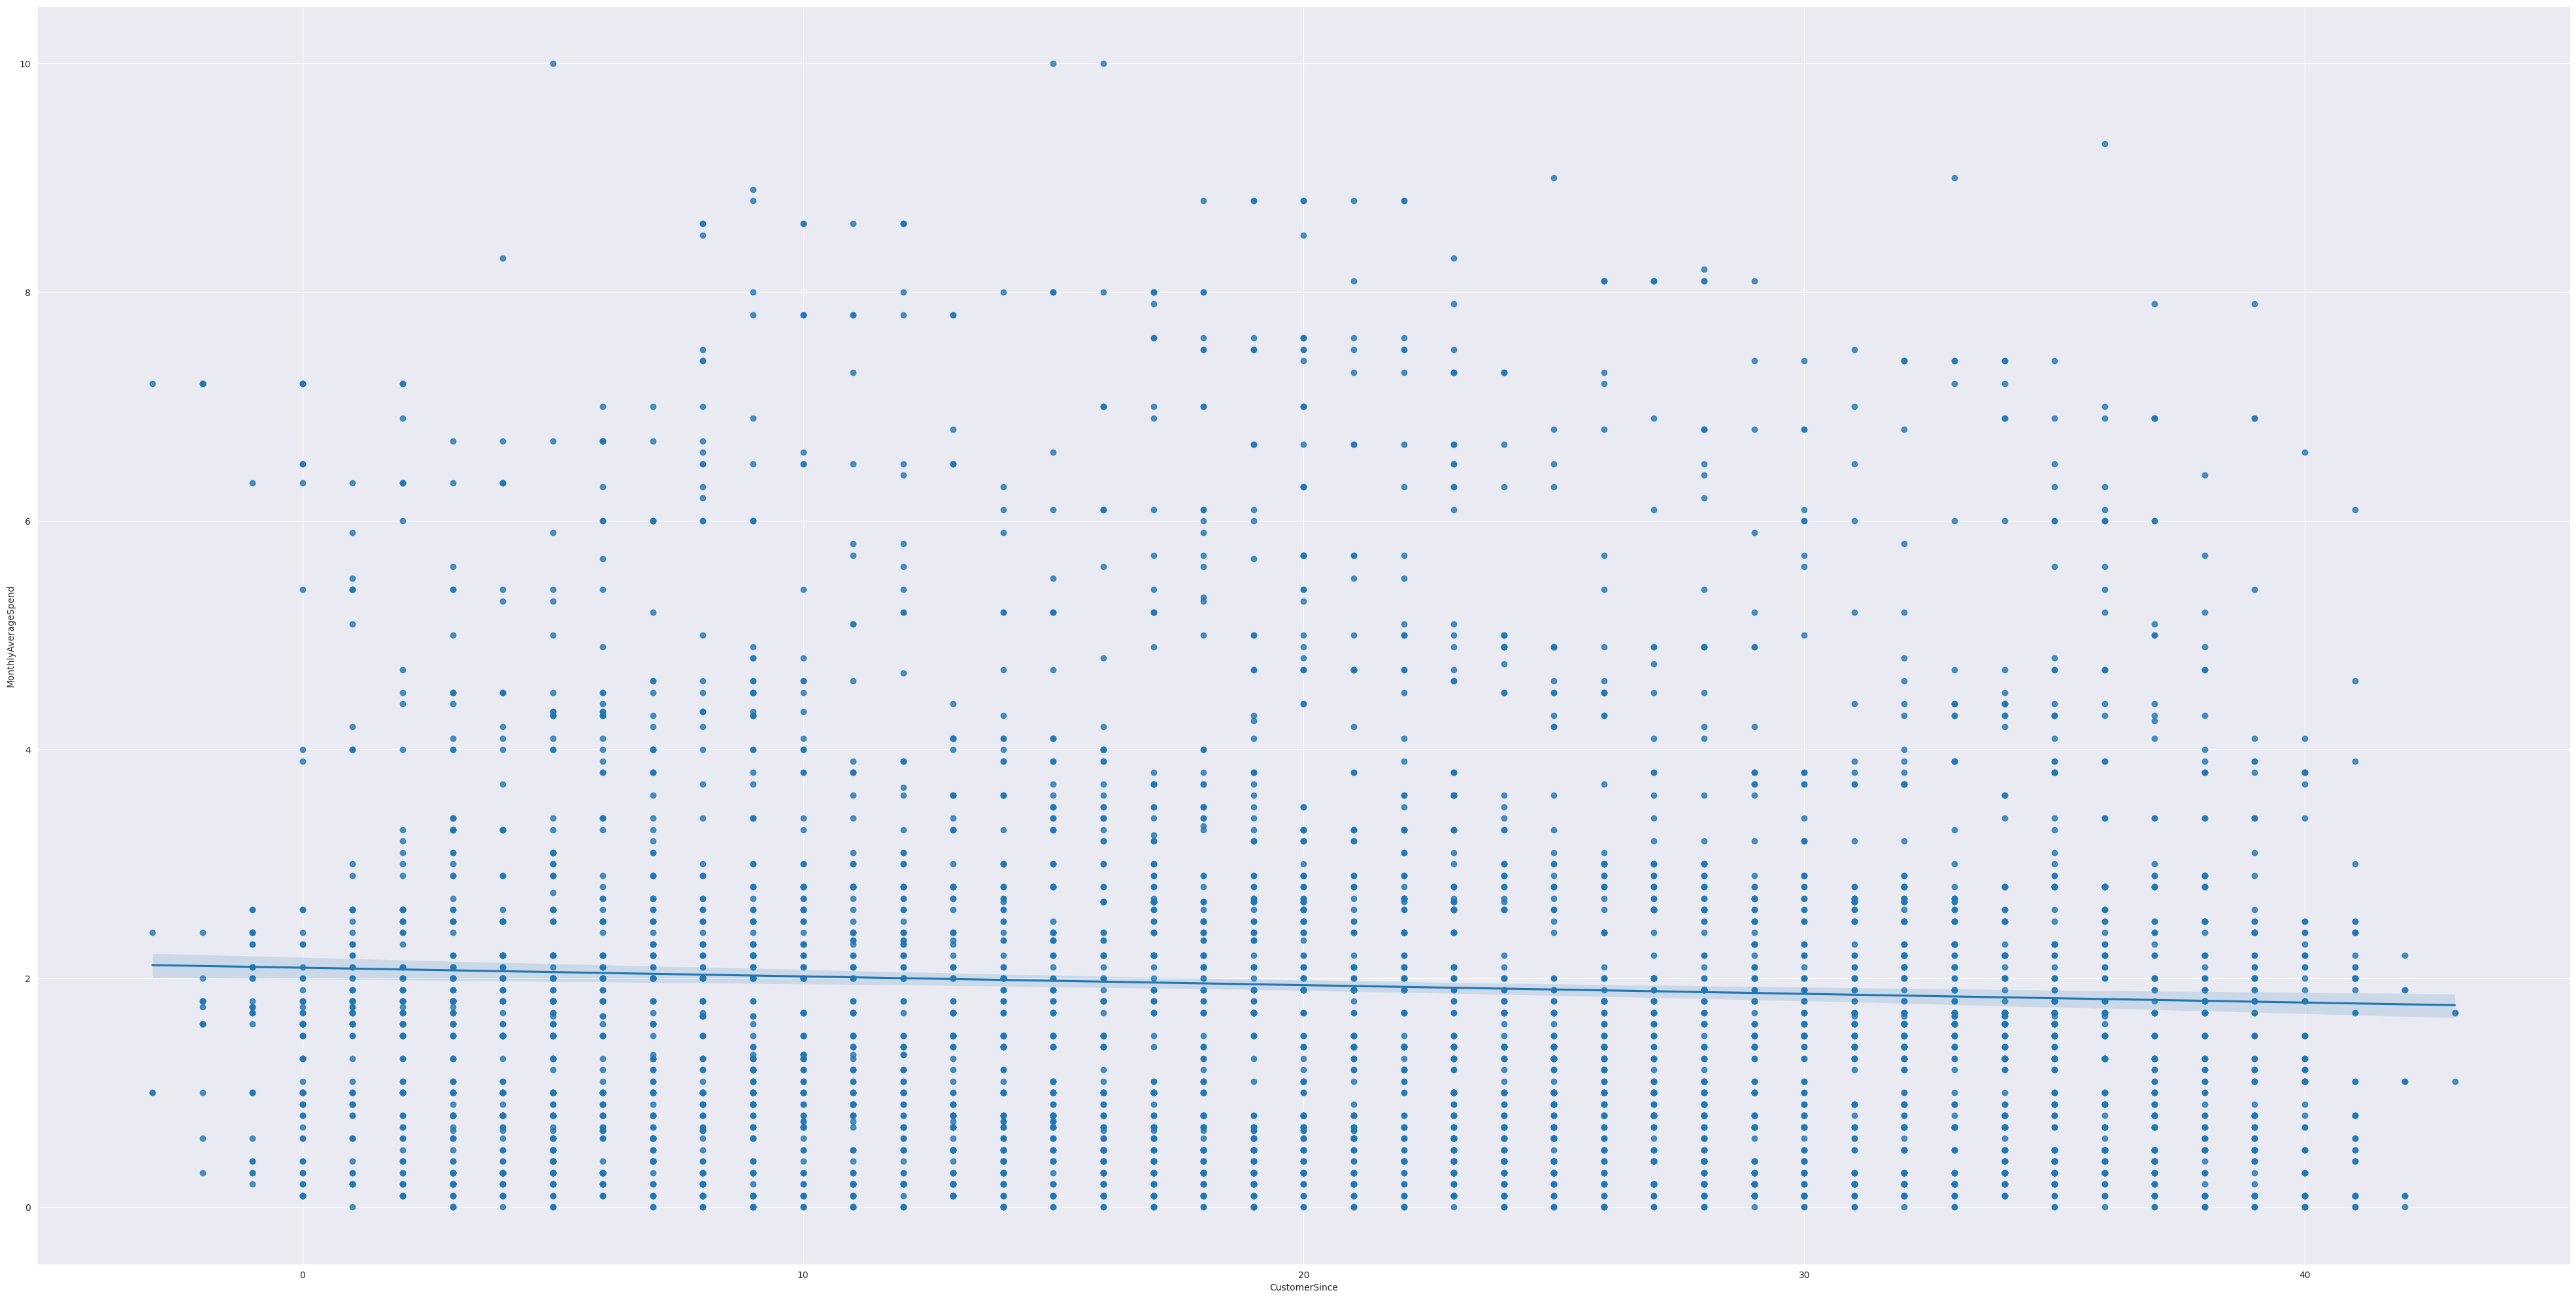

In [ ]:
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='CustomerSince',y='MonthlyAverageSpend', data=df) # regression plot - scatter plot with a regression line

> **Customer period is not dependent on spend**

**Mortgage vs MonthlyAverageSpend**

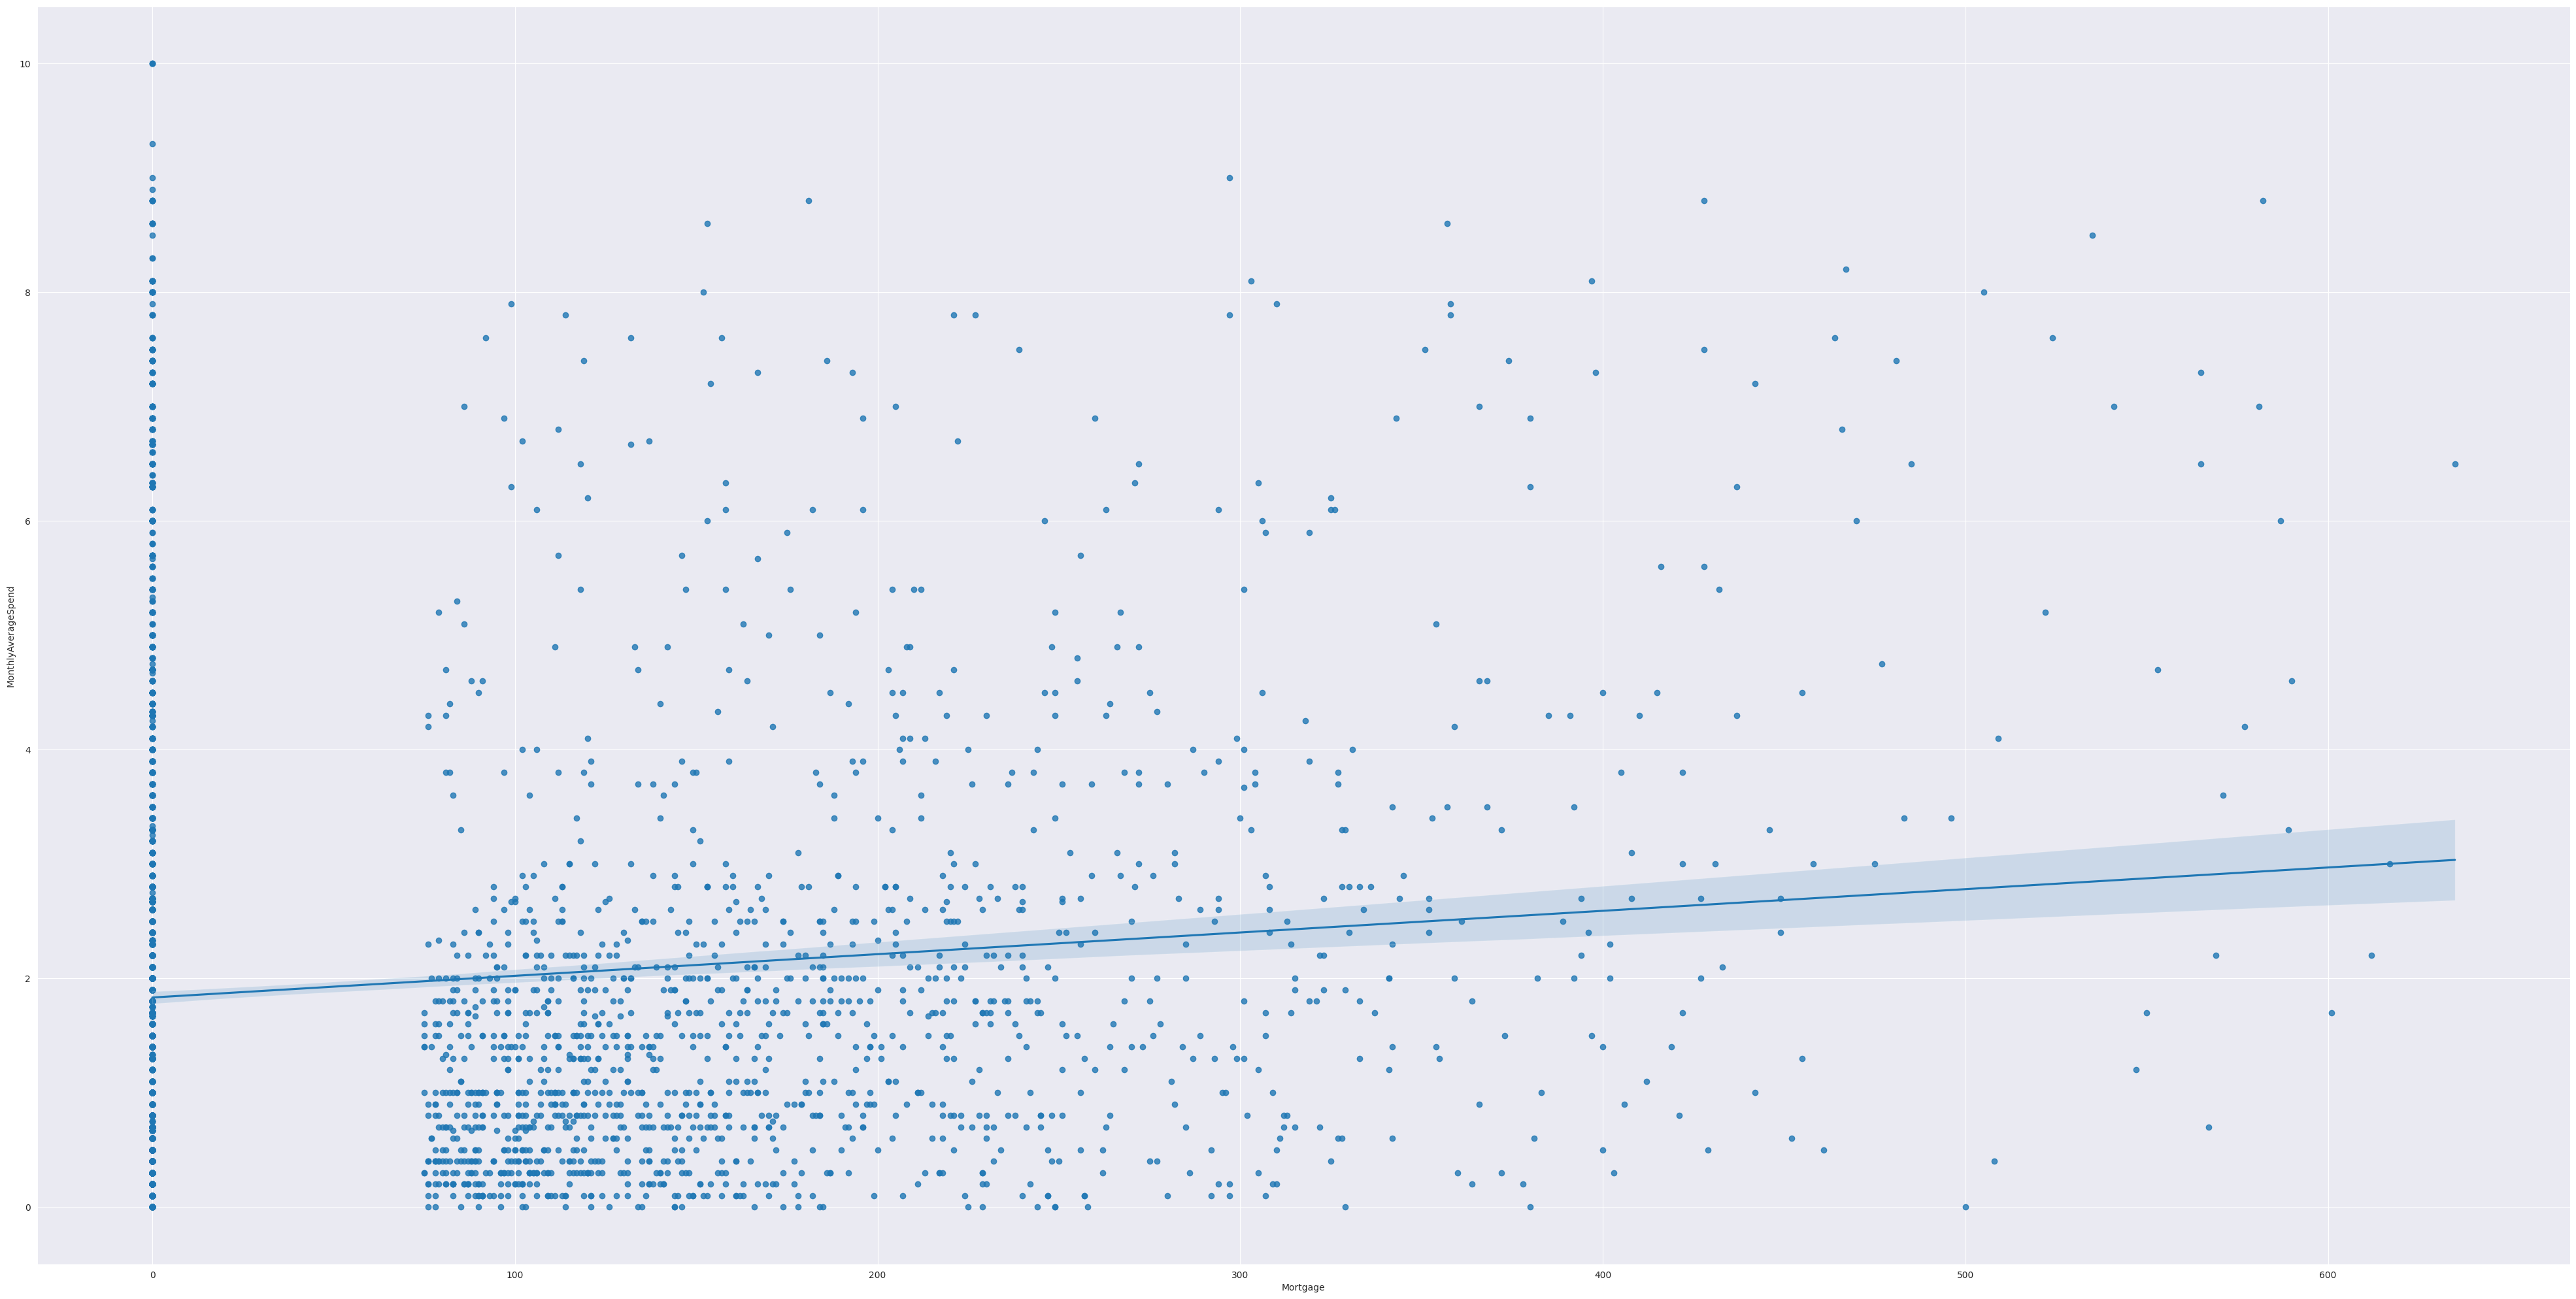

In [ ]:
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='Mortgage',y='MonthlyAverageSpend', data=df) # regression plot - scatter plot with a regression line

**Mortgage value has slight relationship with spend**

**Correlation among pairs of continuous variables**

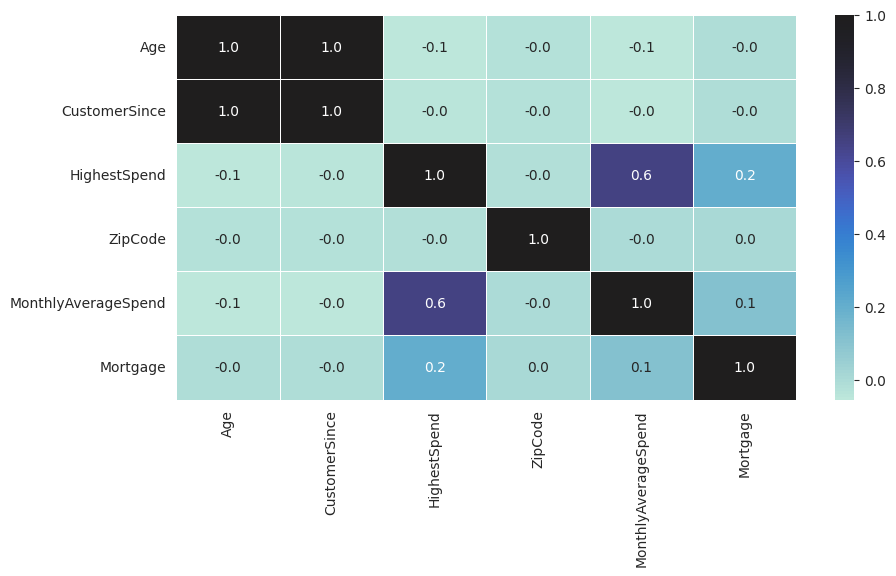

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

> **Age and customer since has correlation as 1. Any one can be used for the model.**

> **Highest spend has large correlation with monthly average spend**

> **Mortage and highest spend has little correlation**

> **Rest of the variables does not have any relation**

**Category vs Category**

**Hidden Score vs Loan on card**

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'])

ValueError: ignored

<Figure size 1500x700 with 0 Axes>

> **Hidden score is more for non-loan holders**

**Level vs Loan on card**

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['Level'],hue=df['LoanOnCard'])

ValueError: ignored

<Figure size 1500x700 with 0 Axes>

> **Level 1 has minimum number of loan holders**

> **Loan holders in Level 2 and 3 are nearly equal**

**Security vs Loan on card**

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['Security'],hue=df['LoanOnCard'])

ValueError: ignored

<Figure size 1500x700 with 0 Axes>

> **It is surprisingly to see more customers those who have loan does not have any security**

> **Security of loan holders are very less**

**FixedDepositAccount vs  Loanoncard**

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['FixedDepositAccount'],hue=df['LoanOnCard'])
plt.show()

ValueError: ignored

<Figure size 1500x700 with 0 Axes>

> **Count of non loan holders are more**


**We will do point plot to have detailed analysis of categorical variable**

# **MultiVariate Analysis**

**"Monthly average spend" vs "loan" vs "level"**

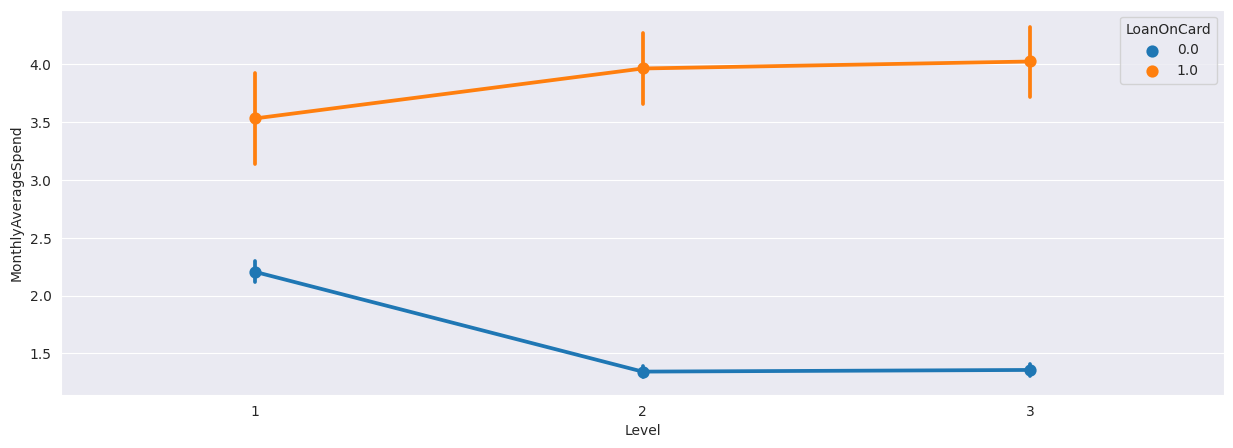

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

> **We can clearly see that loan holder spend more money.Particulary the spend is more on level 2 and 3**

**"MonthlyAverageSpend" vs "Loan" vs "InternetBanking"**

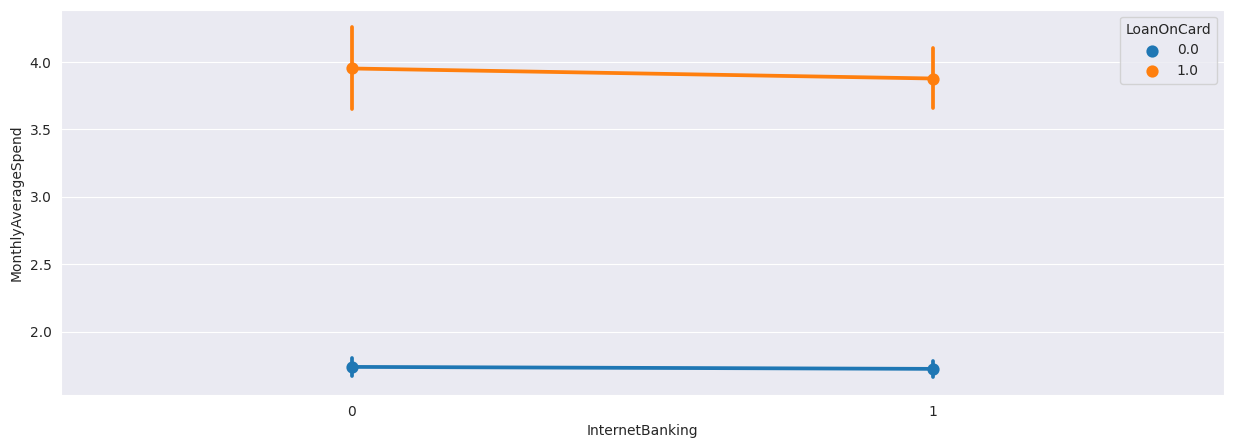

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

> **There is no fluctuation due to internet banking**

**"MonthlyAverageSpend" vs "Loan" vs "CreditCard"**

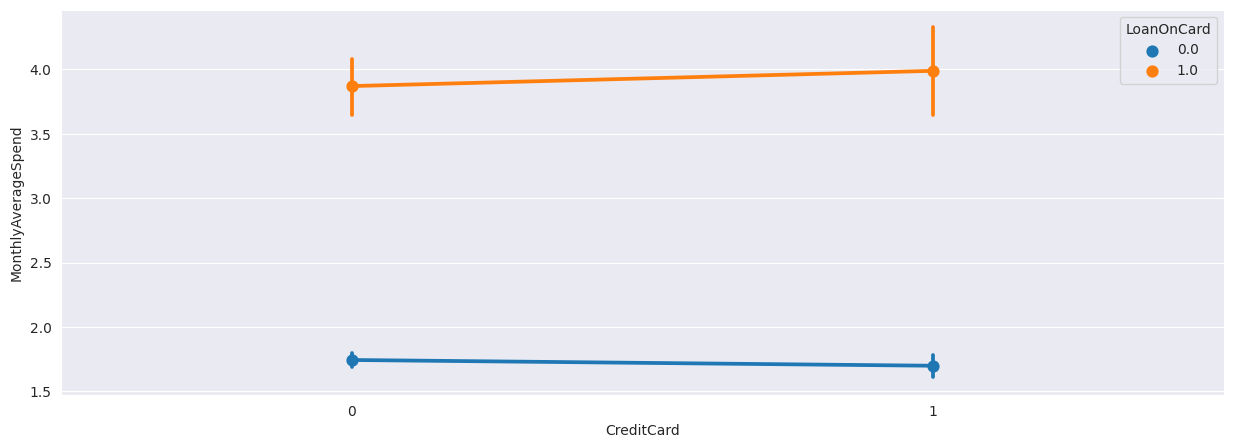

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

> **Spend is slightly more for credit card holders**

**"MonthlyAverageSpend" vs "Loan" vs "FixedDepositAccount"**

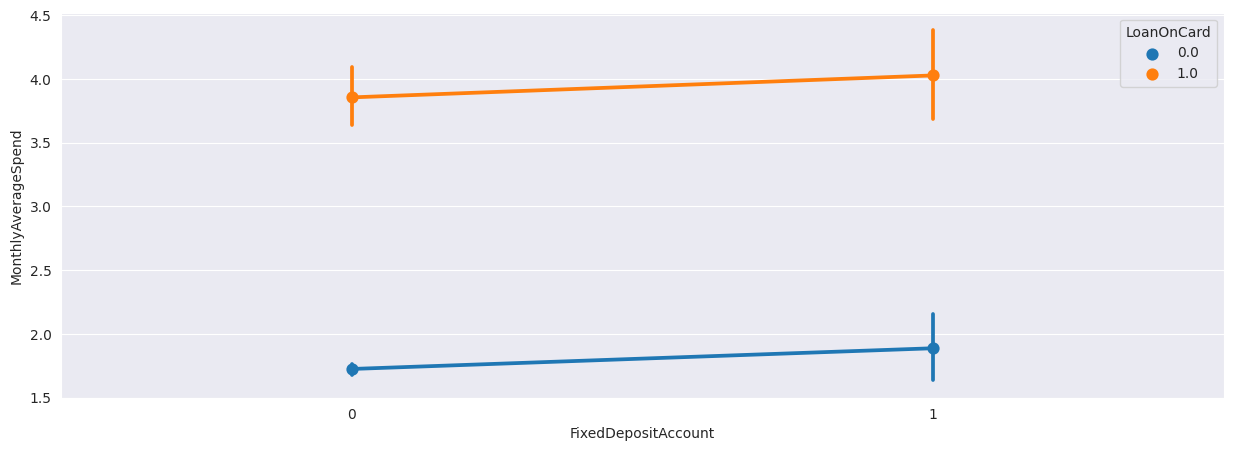

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x="FixedDepositAccount", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

> **Spend is slightly more for FD Account holders**

# Hypothesis Testing

**We can statistically check whether all the independent variables has significant effect on target variables**

In [ ]:
class_summary=df.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

LoanOnCard        Age  CustomerSince  HighestSpend       ZipCode  \
0        0.0  45.383111      20.146889     66.290444  93152.337111   
1        1.0  45.066667      19.843750    144.745833  93153.202083   

   MonthlyAverageSpend    Mortgage  
0             1.729849   51.869111  
1             3.905354  100.845833

**Highest Spend mean values differ huge for loan and non-loan customer**

**Age mean is equal for each class**

**We can check by statistical test**

**Statistical Testing of continuous feature with target variable**

In [ ]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

**Here we will be using two-sample unpaired t-test**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [ ]:
for i in col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5694160158774422
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.527529731162187e-227
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9920253364424511
 Fail to Reject Null Hypothesis.ZipCode of Loan holders and non-Loan holders are  same


 P_Value:2.4144099931230367e-77
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:1.3389598194359617e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




**We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model**

In [ ]:
df.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

**Statistical Testing of categorical features with target variable**

**Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)**

**H1: There is significant difference in hidden score for different category of target variable(Loan on card)**    

In [ ]:
crosstab=pd.crosstab(df['LoanOnCard'],df['HiddenScore'])
print(crosstab)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134


**Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in Hiddenscore among Loan on card (0 and 1)?**

In [ ]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 1.5107064617649127e-06


In [ ]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))

 Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of target variable(Loan on card)


**Similarly we will check for other categorical columns**

In [ ]:
cat_col=list(df.select_dtypes(include=['category']).columns)

In [ ]:
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')

In [ ]:
for i in cat_col:
    crosstab=pd.crosstab(df['LoanOnCard'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




**We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model**

In [ ]:
df.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

# 4. Data Pre-processing

# **Outlier Analysis**

**We are imputing outiers with mean**

In [ ]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [ ]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




> **We have imputed all outliers with mean value**

# **Checking on Target Imbalance**

TypeError: ignored

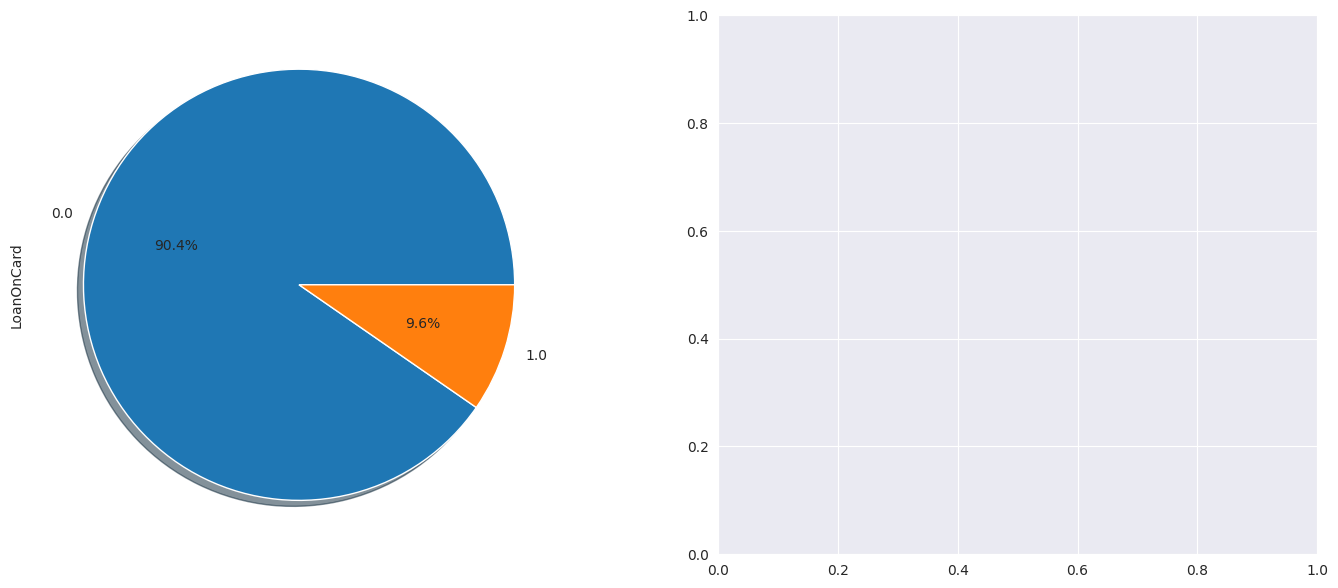

In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

> **There is huge imbalance in target variable.** 

> **If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.**

> **A widely adopted technique for dealing with highly unbalanced datasets is called resampling**

**Two widely used resampling methods:**
    
**Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.**

**Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class**

**Here we will use oversampling because undersampling may remove important information from the dataset**

#  Predictors and Target

In [ ]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

**SMOTE for target imbalance**

**Here we are building model without sampling**

# Train - Test Split

In [ ]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 5. Model training, testing and tuning:

# **Logistic Regression Model**

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9502008032128514
Accuracy on Test data: 0.940562248995984


**94% accuracy on training set and 93% accuracy on test set.**

**Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good**

**Confusion Matrix**

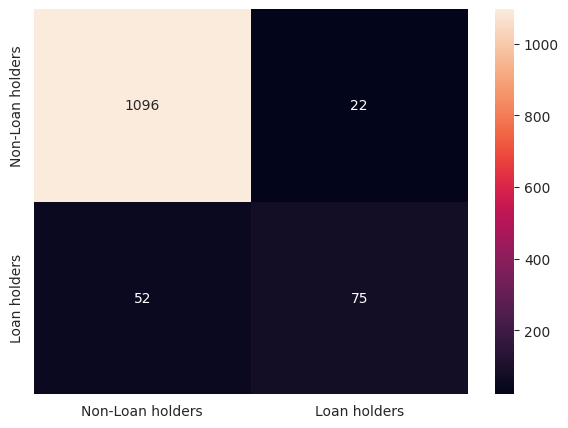

In [ ]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

**In the above figure 76 and 26 are the errors in the model.**

**we are getting very less error**

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1118
         1.0       0.77      0.59      0.67       127

    accuracy                           0.94      1245
   macro avg       0.86      0.79      0.82      1245
weighted avg       0.94      0.94      0.94      1245



**Here you can see model is poor in predicting class 1 compared to class 0**

**Accuracy is good but in this case we need to look on recall value**

**Here Recall tells that only 48% class 1 is predicted correctly from actual values**

**We dont have enough sample of class 1 to train the model.**

**We will do the sampling and check how recall values improves in this case.**

# **SMOTE**

**Here we are doing smote for all  data**

In [ ]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [ ]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [ ]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


**we can see the target is balanced after sampling**

In [ ]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8746666666666667
Accuracy on Test data: 0.884


**Here both accuracy is reduced after sampling. Let us check on the classification report.**

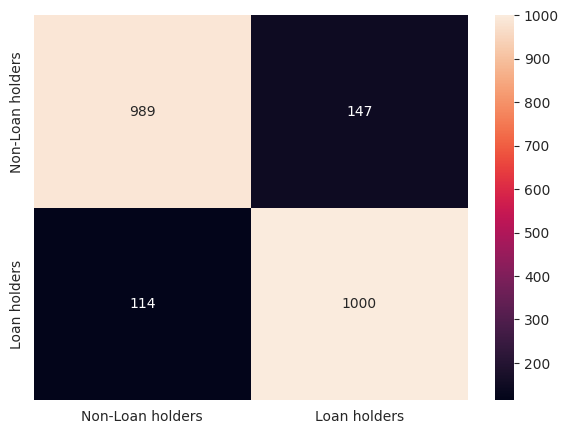

In [ ]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1136
         1.0       0.87      0.90      0.88      1114

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250



**Now we can see recall value is improved after sampling.**

**So whenever we have imbalance target we will use sampling method to balance the data.**

**If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.**

**we are doing smote only for training data**

In [ ]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [ ]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8722891566265061
Accuracy on Test data: 0.8618473895582329


**we can see there is decrease in test accuracy.**

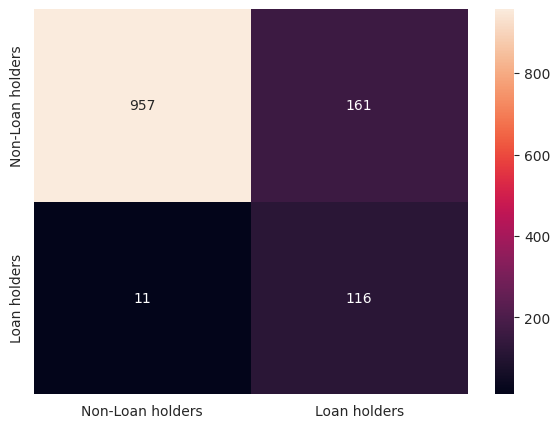

In [ ]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1118
         1.0       0.42      0.91      0.57       127

    accuracy                           0.86      1245
   macro avg       0.70      0.88      0.75      1245
weighted avg       0.93      0.86      0.88      1245



**After doing sampling only on training data we can see difference in values**

**We are getting good recall value but the precision value is reduced**

**We will do sampling oly on training data to check real performance of the model**

# **Naive Bayes Model**

In [ ]:
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8725568942436412
Accuracy on Test data: 0.8610441767068273


**Here accuracy in test data slightly less compared to training data.**

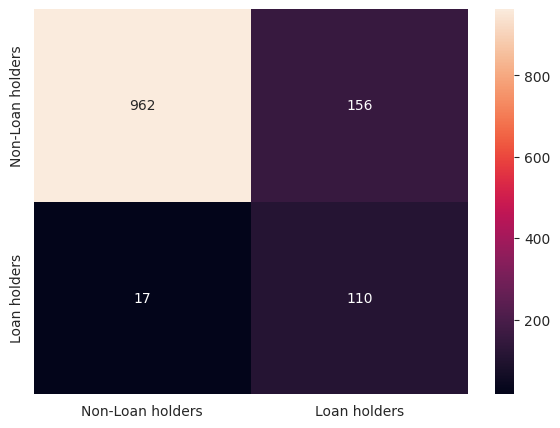

In [ ]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [ ]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1118
         1.0       0.41      0.87      0.56       127

    accuracy                           0.86      1245
   macro avg       0.70      0.86      0.74      1245
weighted avg       0.92      0.86      0.88      1245



**Recall value is good for both the classes**

**Recall value for class 1 is less in naive bayes model compared to logistic regression.**

**K-Fold CV for finding best model**

In [ ]:
LR_model=LogisticRegression()
SVC_model=SVC()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

LR: 0.946787 (0.007254)
KNN: 0.924900 (0.007082)
NB: 0.907430 (0.013750)
SVC: 0.906225 (0.012891)


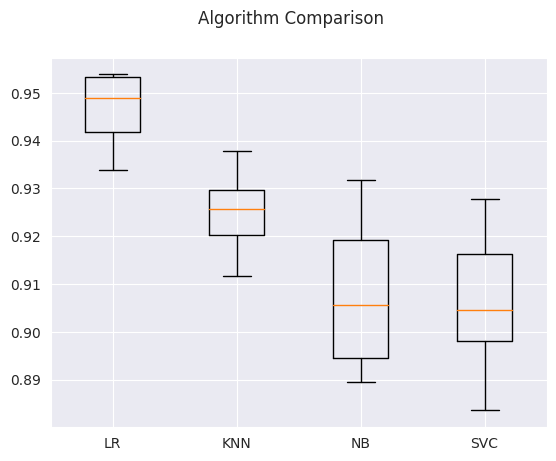

In [ ]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVC',SVC_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.**

**Naive bayes performance is less compared to others.**

**As we are having imbalanced data we will use stratified k-fold to check the performance.**

LR: 0.945582 (0.004255)
KNN: 0.924900 (0.005694)
NB: 0.908233 (0.015162)
SVC: 0.906225 (0.004021)


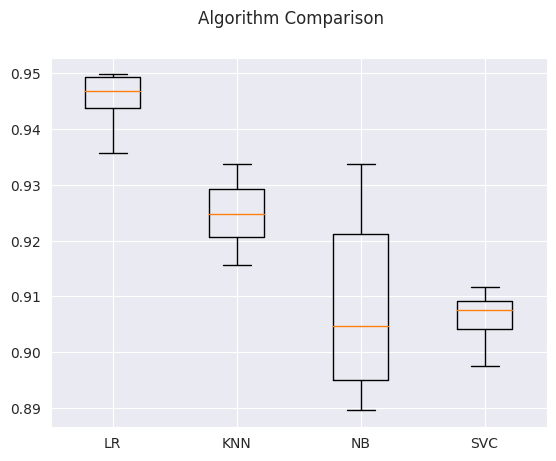

In [ ]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVC',SVC_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Very slight improvement in accuracy**

# **6.Conclusion  and improvisation.**

> **We are selecting final model as logistic regression as it performs well in training and testing test.**

> **Logistic Regression is not affected by overfitting and it is also has good recall value.**

> **Logistic regression performed well in k-fold cross validation as well.**

> **Deviation also less in logistic regression.**

> **Sampling improved to predict minority classes as well**

> **Suggesting to collect data equally for both the classes.**

> **Few customers does't have credit card but those customer having loan on card. This data error can be avoided**
